In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

The data has 7752 rows and 25 columns in the given data frame.

In [3]:
 df.head(10)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   
5      6.0  30-06-2013          31.9          23.5    52.437126    85.307251   
6      7.0  30-06-2013          31.4          24.4    56.287189    81.019760   
7      8.0  30-06-2013          32.1          23.6    52.326218    78.004539   
8      9.0  30-06-2013          31.4          22.0    55.338791    80.784607   
9     10.0  30-06-2013          31.6          20.5    56.651203    86.849632   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   
5         29.219342         23.822613  6.182295   50.231389  ...         0.0   
6         28.551859         24.238467  5.587135  125.110007  ...         0.0   
7         28.851982         23.819054  6.104417   42.011547  ...         0.0   
8         28.426975         23.332373  6.017135   85.110971  ...         0.0   
9         27.576705         22.527018  6.518841   63.006075  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   
5         0.0         0.0  37.5102  127.042   54.6384  0.1457   
6         0.0         0.0  37.5776  126.838   12.3700  0.0985   
7         0.0         0.0  37.4697  126.910   52.5180  1.5629   
8         0.0         0.0  37.4967  126.826   50.9312  0.4125   
9         0.0         0.0  37.4562  126.955  208.5070  5.1782   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  
5      5873.780762       31.5       24.0  
6      5849.233398       30.9       23.4  
7      5863.992188       31.1       22.9  
8      5876.901367       31.3       21.6  
9      5893.608398       30.5       21.0  

[10 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
df.shape

(7752, 25)

In [6]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

the data has object and float type data. Next_Tmax and Next_Tmin are our label columns and the rest are features. The Date feature is in object type.

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see the data has Null values in Station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, Next_Tmax, Next_Tmin. Since the Next_Tmax and Next_Tmin are the labels we will drop the nulls in these columns and fill the nulls in other features except Station and Date with their mean values.

In [8]:
null_col = ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
for val in null_col:
    df[val].fillna(df[val].mean(),inplace = True)
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We have successfully filled nulls of all other columns except Station, Date, Next_Tmax and Next_Tmin. We will drop these null values to remove all the remaining nulls from the data.

In [10]:
df.dropna(axis = 0,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7723 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7723 non-null   float64
 1   Date              7723 non-null   object 
 2   Present_Tmax      7723 non-null   float64
 3   Present_Tmin      7723 non-null   float64
 4   LDAPS_RHmin       7723 non-null   float64
 5   LDAPS_RHmax       7723 non-null   float64
 6   LDAPS_Tmax_lapse  7723 non-null   float64
 7   LDAPS_Tmin_lapse  7723 non-null   float64
 8   LDAPS_WS          7723 non-null   float64
 9   LDAPS_LH          7723 non-null   float64
 10  LDAPS_CC1         7723 non-null   float64
 11  LDAPS_CC2         7723 non-null   float64
 12  LDAPS_CC3         7723 non-null   float64
 13  LDAPS_CC4         7723 non-null   float64
 14  LDAPS_PPT1        7723 non-null   float64
 15  LDAPS_PPT2        7723 non-null   float64
 16  LDAPS_PPT3        7723 non-null   float64
 17  

<Axes: >

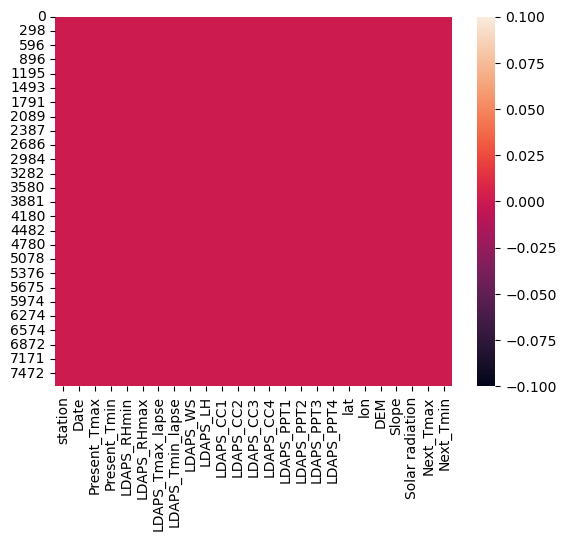

In [11]:
sns.heatmap(df.isnull())

We can see all the nulls have been removed and the data is otherwise clean except for the data type of the date column which we might drop later.

In [12]:
df.nunique().to_frame("No. of unique values")

No. of unique values
station                             25
Date                               310
Present_Tmax                       168
Present_Tmin                       156
LDAPS_RHmin                       7646
LDAPS_RHmax                       7638
LDAPS_Tmax_lapse                  7649
LDAPS_Tmin_lapse                  7649
LDAPS_WS                          7649
LDAPS_LH                          7649
LDAPS_CC1                         7544
LDAPS_CC2                         7556
LDAPS_CC3                         7573
LDAPS_CC4                         7498
LDAPS_PPT1                        2799
LDAPS_PPT2                        2499
LDAPS_PPT3                        2346
LDAPS_PPT4                        1913
lat                                 12
lon                                 25
DEM                                 25
Slope                               25
Solar radiation                   1575
Next_Tmax                          183
Next_Tmin                          157

In [13]:
pd.set_option('display.max_columns',None)
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7723.000000   7723.000000   7723.000000  7723.000000  7723.000000   
mean     13.008157     29.769804     23.225314    56.740950    88.371500   
std       7.214034      2.956157      2.400841    14.571702     7.155898   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.045780    84.291611   
50%      13.000000     29.900000     23.400000    55.266701    89.699196   
75%      19.000000     32.000000     24.900000    66.991833    93.702629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7723.000000       7723.000000  7723.000000  7723.000000   
mean          29.616623         23.512221     7.095384    62.459258   
std            2.927713          2.330885     2.165080    33.505514   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.696327         22.114527     5.686500    37.460390   
50%           29.664030         23.733589     6.564141    57.299645   
75%           31.684914         25.134434     7.996720    83.884903   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7723.000000  7723.000000  7723.000000  7723.000000  7723.000000   
mean      0.368455     0.355766     0.318091     0.299044     0.588771   
std       0.260963     0.256571     0.248771     0.252855     1.918605   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.148259     0.142482     0.103248     0.082738     0.000000   
50%       0.319678     0.315159     0.265058     0.232663     0.000000   
75%       0.571472     0.554287     0.493479     0.497073     0.067101   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7723.000000  7723.000000  7723.000000  7723.000000  7723.000000   
mean      0.481631     0.275152     0.267353    37.544753   126.991373   
std       1.736231     1.138910     1.185557     0.050370     0.079318   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.024025     0.009648     0.000696    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7723.000000  7723.000000      7723.000000  7723.000000  7723.000000  
mean     61.913798     1.258368      5342.112868    30.275437    22.932837  
std      54.308844     1.370719       429.072274     3.123441     2.483181  
min      12.370000     0.098500      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5437.534180    30.500000    23.100000  
75%      59.832400     1.767800      5728.624512    32.600000    24.600000  
max     212.335000     5.178200      5992.895996    38.900000    29.800000

The station has info of 25 different stations and hence we wont check for the outliers of this data.
The present Tmax has mean very close to the median which around 29.9. So the data has very good standard distribution. The data can have some outliers as the max is around 37.6 and min is around 20.0. So possibly having outliers on the lower side.
Similarly we can see a similar trend for the Tmin feature as well. The low of the data is 11.3 which is much lower than the 25% value of the data. So possibly has outliers on the lower side of the data.
the relative humidity min also has a good bell shaped curve and possible outliers on the upper side of the data as the max is 98.52 much higher than the 75% of the data which is 66.99
the RH max feature also shows a similar trend but might not have outliers on the upper side of the data but can possibly have outliers on the lower side of the data.


In [14]:
df = df.drop('Date',axis = 1)

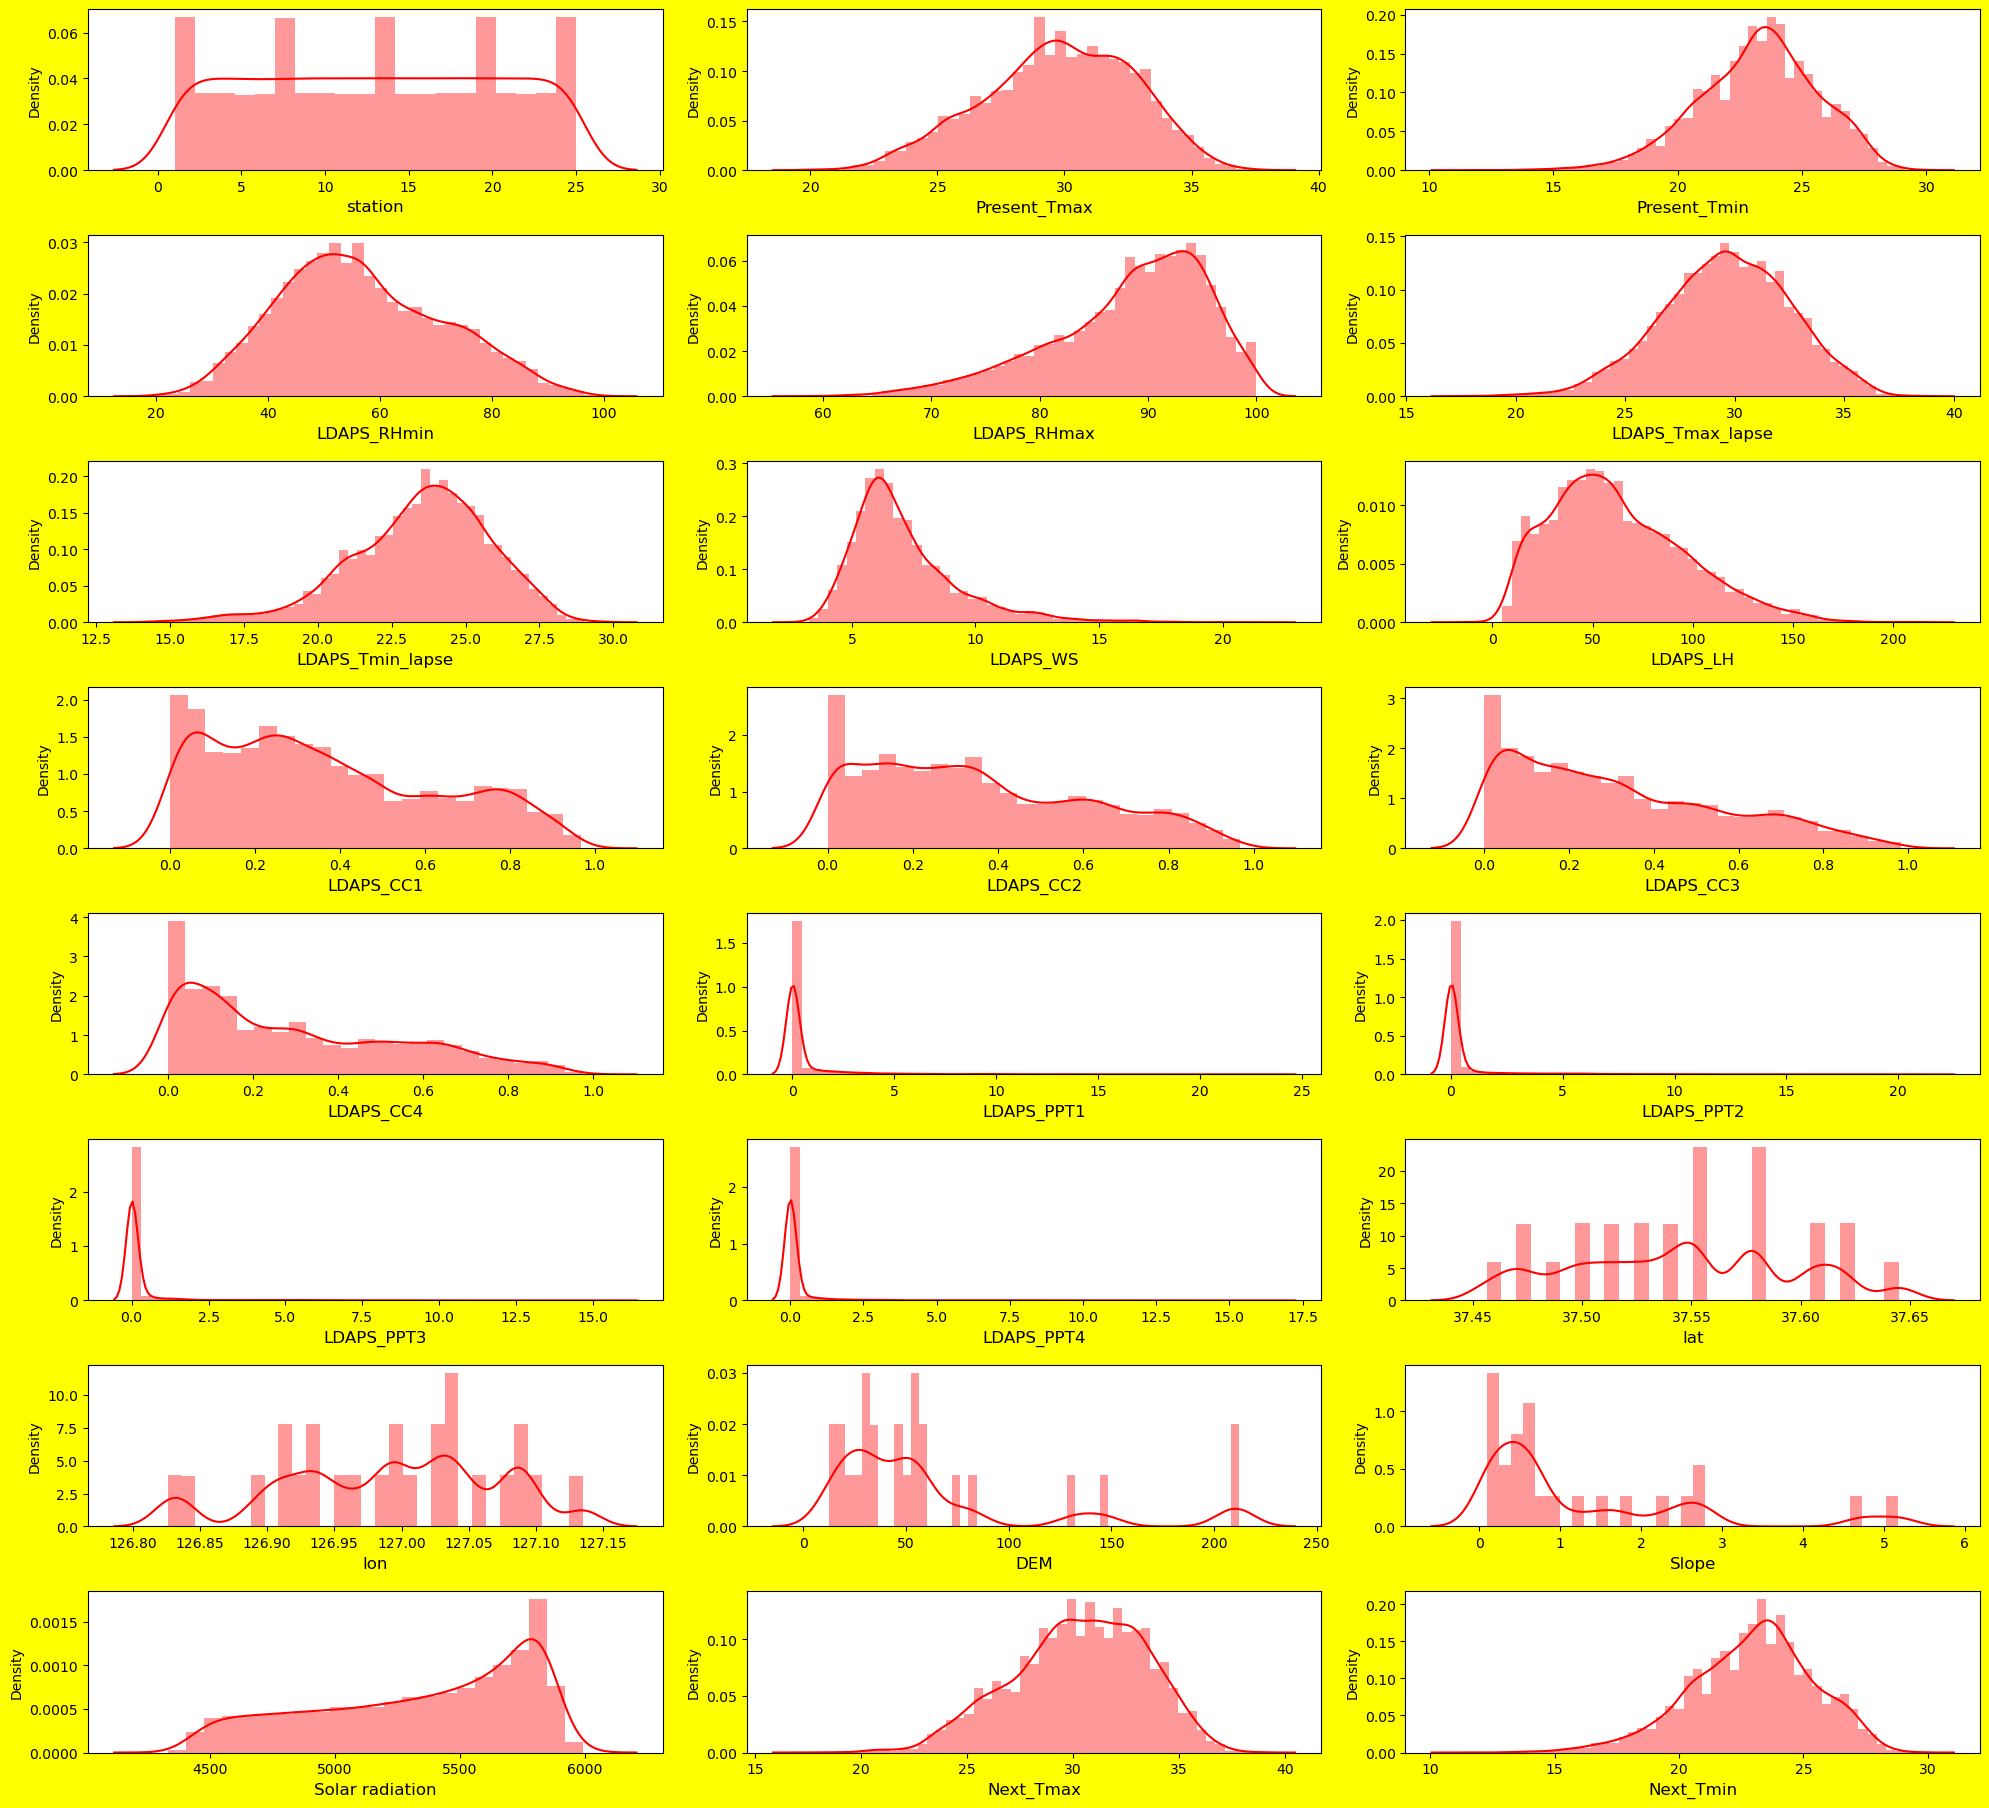

In [15]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(df[column],color = "r")
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout()

We can observe the station feature has 25 stations and might not have any outliers.
the Present_Tmax feature is a normal distribution but is slightly skewed to the right and can have outliers on the left i.e. the lower part of the data.
Similarly we can see skewness and normal distribution for Present_Tmin
The LDAPS_RHmin gives the relative humidity and is slightly skewed to the left with possibility of outliers in the upper part of the data and some outliers in the lower part as well.
The LDAPS_RHmax is skewed to right and possibly has outliers in the lower part of the data.
LDAPS_Tmax_lapse and LDAPS_Tmin_lapse both show similar dist graphs with possibility of outliers in the lower side of the data.
the LDAPS_WS definitely is skewed to the left and has outliers in the upper part of the data. We can see a similar graph for LDAPS_LH as well.
The LDAPS_CC1 is a flat distributed graph and might not have much outliers and similar is the graph for LDAPS_CC2, LDAPS_CC3, LDAPS_CC4 with possibility of outliers in the upper part of the data.
All the data of LDAPS_PPT1,2,3 and 4 are all skewed to the left and has outliers as well.
The data has been distributed for different latitudes and longitudes.
The solar radiation info shows more is the solar radiation less is the cloud cover and hence more is the temperature of the place.
the last two are labels and has normal distribution.

<Figure size 1000x1000 with 0 Axes>

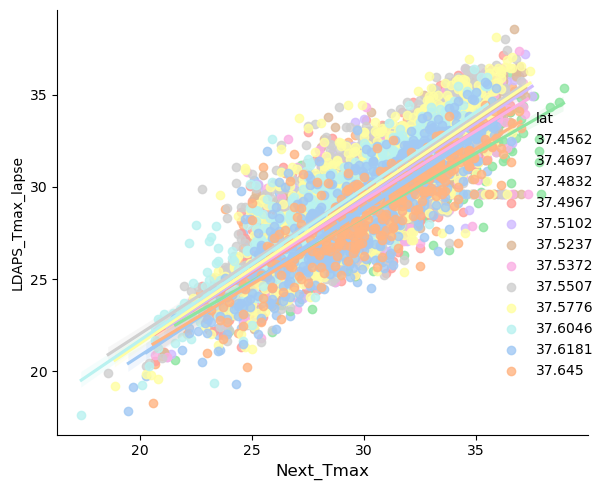

In [16]:
plt.figure(figsize=(10,10),facecolor="yellow")
sns.lmplot(x='Next_Tmax',y='LDAPS_Tmax_lapse',data = df,hue = 'lat',palette = 'pastel')
plt.xlabel('Next_Tmax',fontsize =12)
plt.ylabel('LDAPS_Tmax_lapse')
plt.tight_layout()

We can observe there is a positive relation of LDAPS_Tmax_lapse and Next_Tmax. The place at the highest latitude has a lower temperature whereas a place at the lowest latitude has the highest temperature which is how close a place is to the equator. This feature has a good correlation and is useful for prediction.

<Figure size 1500x1000 with 0 Axes>

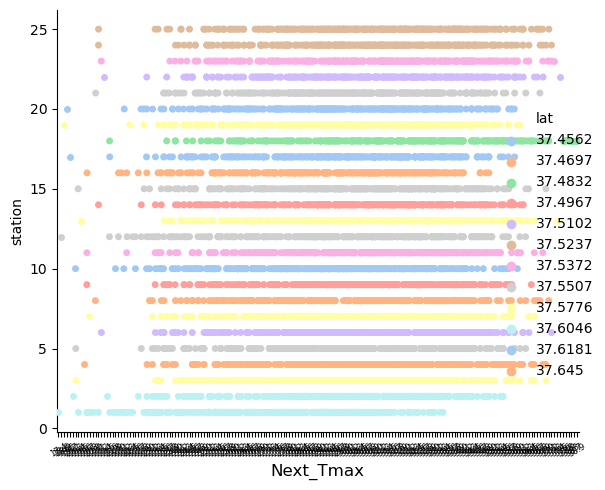

In [17]:
plt.figure(figsize=(15,10),facecolor="yellow")
sns.catplot(x='Next_Tmax',y='station',data = df,hue = 'lat',palette = 'pastel')
plt.xlabel('Next_Tmax',fontsize =12)
plt.ylabel('station')
plt.xticks(fontsize = 6,rotation = 30)
plt.tight_layout()

Different stations seems to have been assigned different places in different latitudes and hence the graph is the way it is.

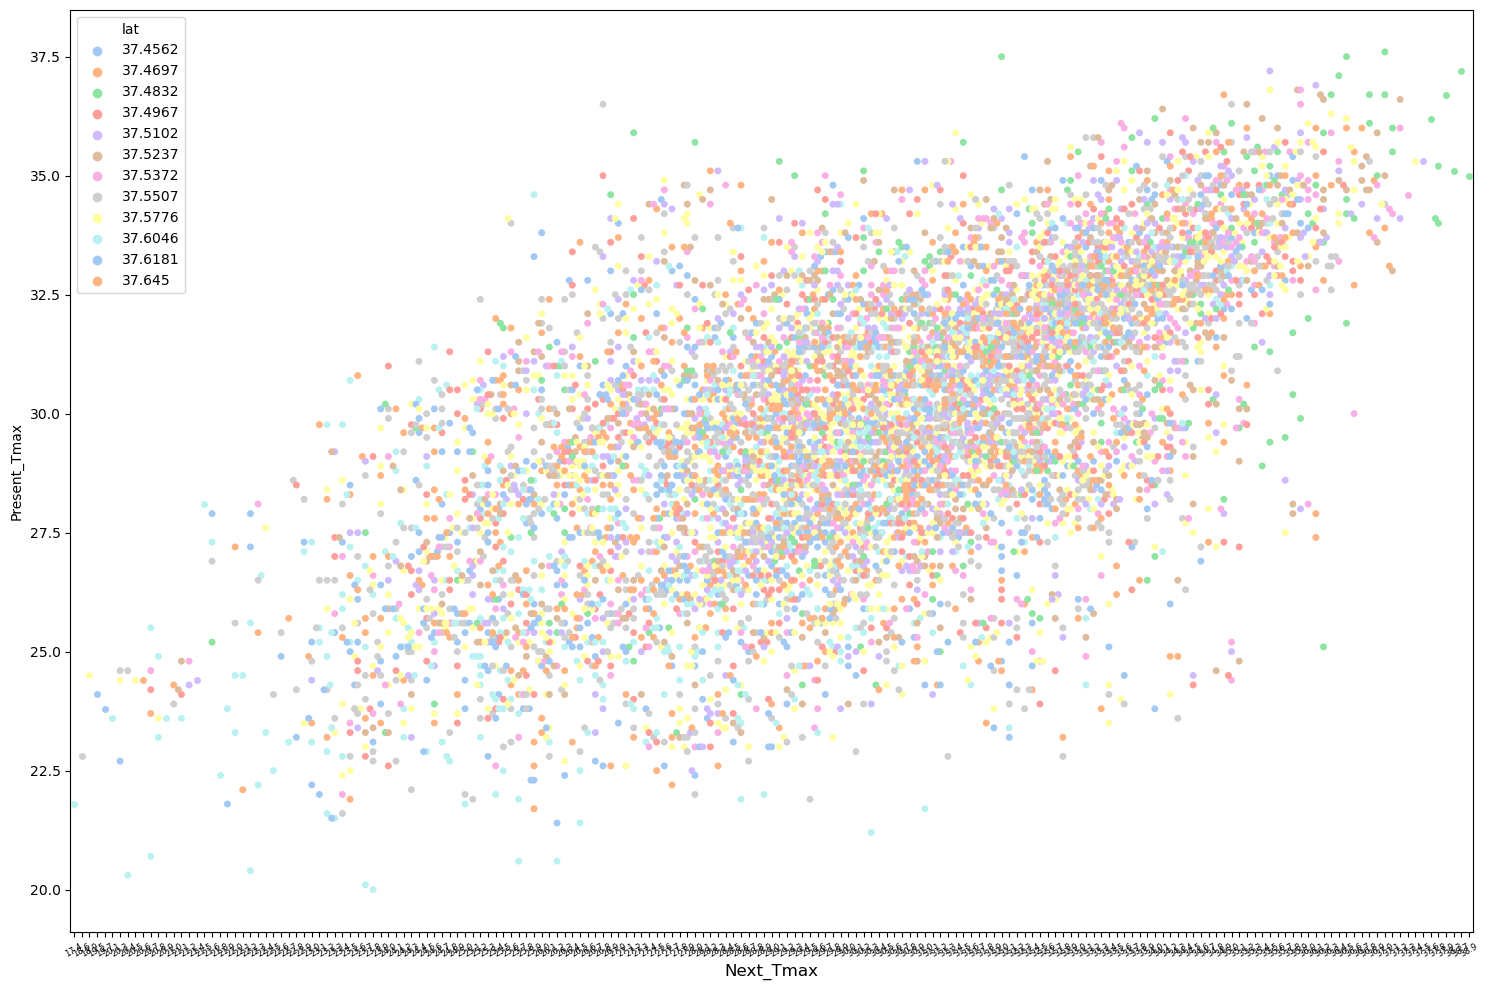

In [18]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='Next_Tmax',y='Present_Tmax',data = df,hue = 'lat',palette = 'pastel')
plt.xlabel('Next_Tmax',fontsize =12)
plt.ylabel('Present_Tmax')
plt.xticks(fontsize = 6,rotation = 30)
plt.tight_layout()

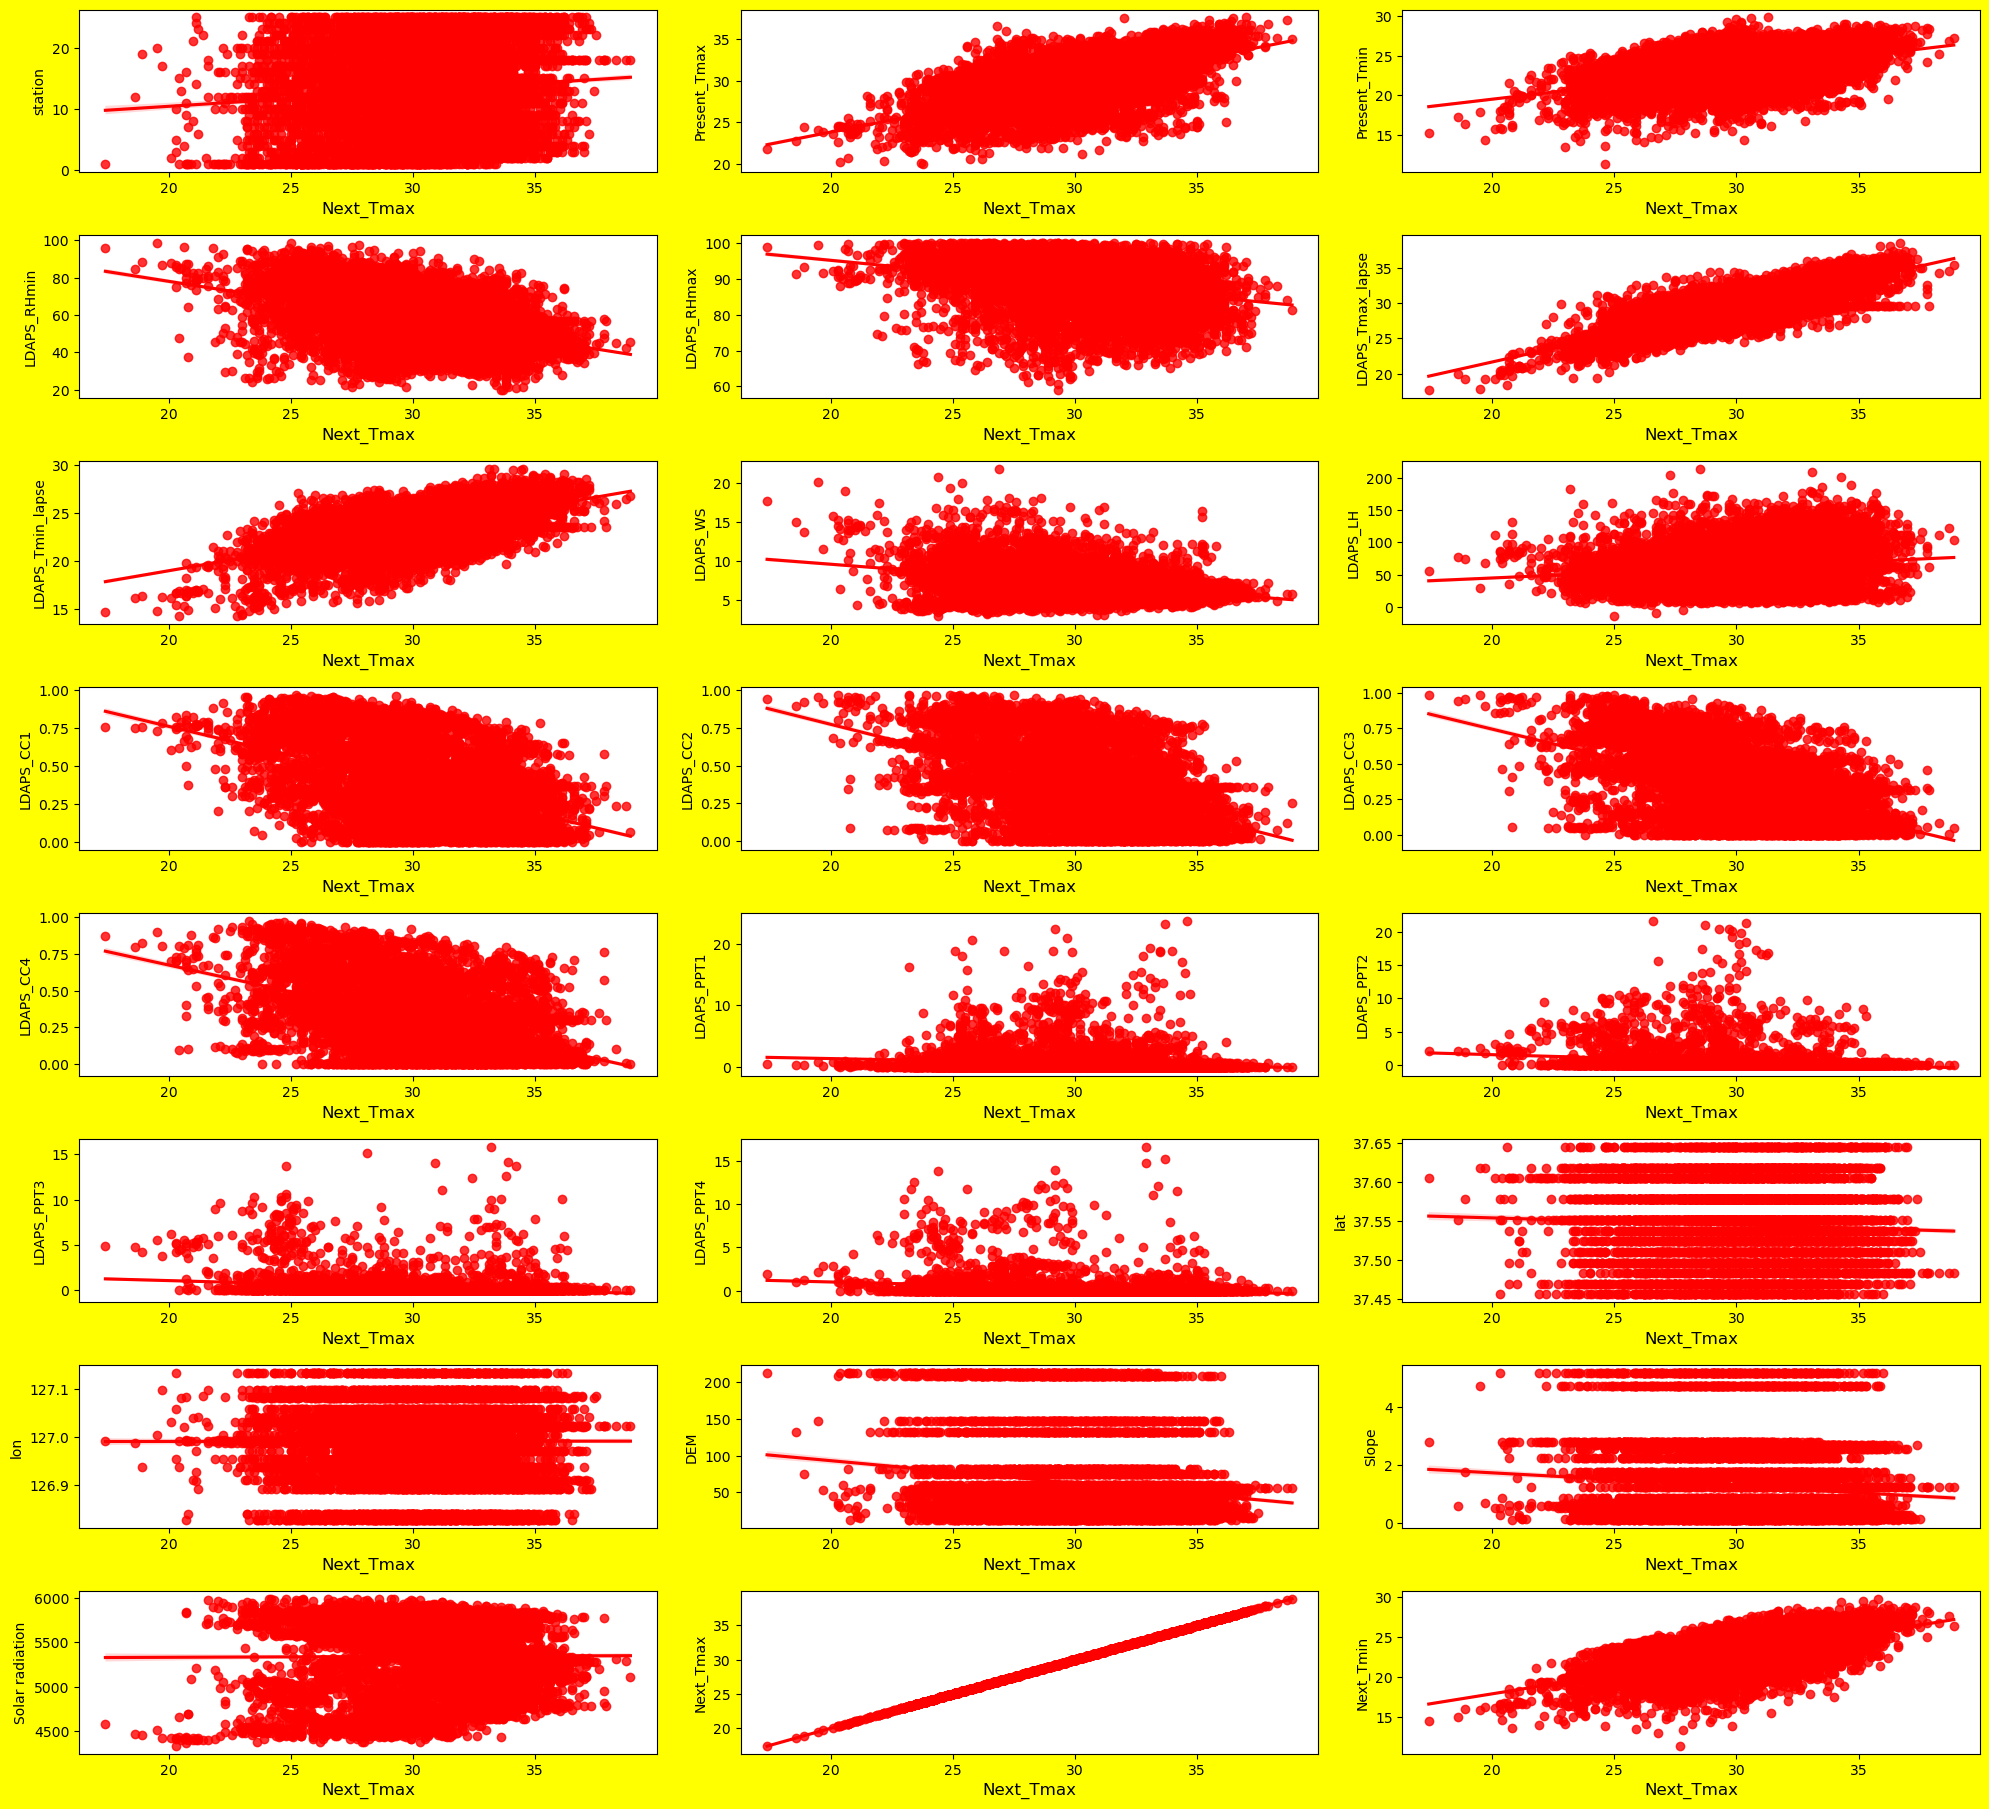

In [19]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 27:
        ax = plt.subplot(9,3,plotnumber)
        sns.regplot(y = df[column],x = 'Next_Tmax',data = df , color = "r")
        plt.xlabel('Next_Tmax', fontsize = 12)
    plotnumber+=1
plt.tight_layout()

For the station data we can see the stations are assigned different places and has a positive correlation with the label.
The nexttmax and present tmax has a positive correlation. Although there are data values where the data for next tmax is not accurate but is comes close to the accurate predictions mostly.
Similar is the trend in Present tmin as well showing a positive correlation.
LDAPS_RHmin shows a negative correlation. On very humid days the temperature has been low probably because it has rained and on days with relatively low humidity the days have been hot with high temperature. ON very low humidity days the temperature has been moderate not too high.
the max relative humidity has less effect on the max temp as compared to the rh min. SO if it is relatively less humid and it becomes humid later on the day the max temperature does not change much.
the LDAPS_Tmax_lapse and Tmin_lapse are very much correlated to Next_tmax showing high positive relation.
LDAPS_WS and LH are moderately correlated to Next_tmax
THE cloud cover factor of cc1,2,3 and 4 has very high negative correlation with the tmax label showing more is the cloud cover less is the tmax of the region. there are data points where there was low cloud cover but the temp was more and also in moderate cloud cover also there was high temp but the reg line definitely implies more is the cloud cover less is the temp and less is the cloud cover more is the temp.
the ppt also has negative correlation showing more is the ppt less will be the temp. but there are exception to this as well but the implication of the reg line shows a negative relation. it is noticeable the precipitation is quite less in general. So it does not rain heavily when it rains and hence the temp is moderately effected by the rains and not too much.
for different latitudes the temp rise is also quite uniform. there are latitudes which has lower mean temp compared to other places but the increase in temp for all stations seems to be uniform which is as it should be.
Similarly for different longitudes the observation is same as for latitudes.
the places at a higher elevation in DEM definitely shows have a lower temperature as compared to the places at lower elevation. the data shows nearly 4 places which are at a higher elevation and the rest are below 100 m elevation and hence show higher temp than the places at higher elevation.
places with higher slope are at lower temp than places in lower temp.
although a higher solar radiations are received the temp have remained slow. his could be because of cloud cover or ppt as well.

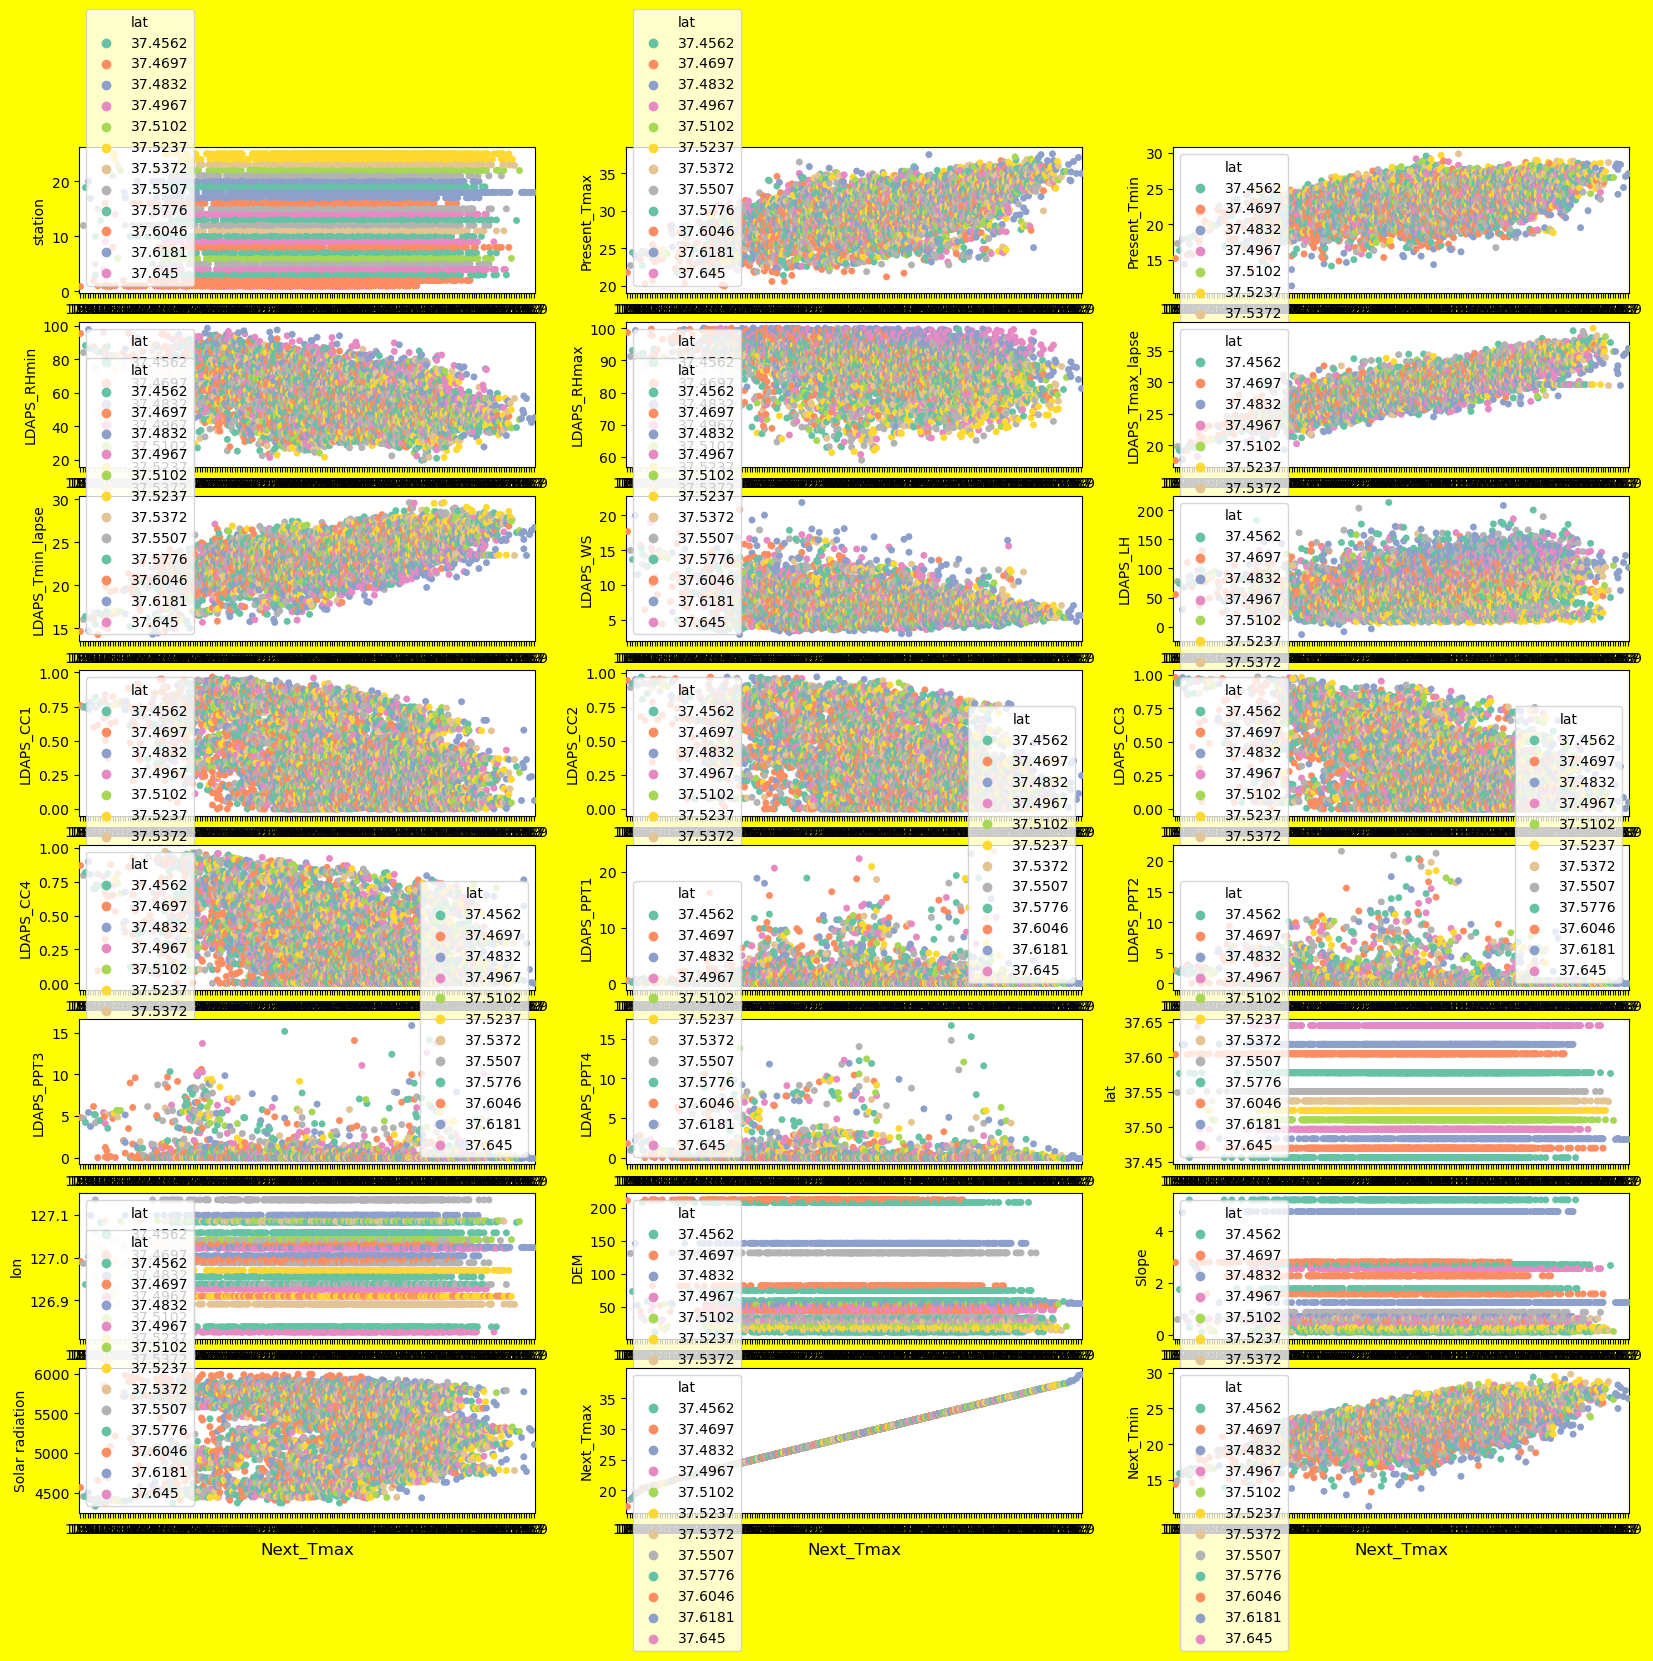

In [20]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 27:
        ax = plt.subplot(9,3,plotnumber)
        sns.swarmplot(y = df[column],x = df['Next_Tmax'],hue = df['lat'],data = df,palette = 'Set2')
        plt.xlabel('Next_Tmax', fontsize = 12)
    plotnumber+=1
plt.tight_layout()

the Next_Tmax and the present Tmax are positively related where present Tmax increases the next Tmax also is changing similarly. Over the period we can see the temperatures are rising on an average.
The relation of RH_max with next Tmax shows that higher the humidity does not imply higher temperature as the days when there has been very high humidity the temperature has stayed between 25 to 35. there are days with higher temperature but the humidity has been relatively lower in these days. Also the RH_min feature shows that lower has been RH_min feature more has been the temp. Lower RH_min shows higher temp. This feature has a high contribution to the temperature of the place.
for the feature of WS we can observe that on the days of high wind speeds the temperatures have stayed relatively low and on the days where Wind speed was less the temperatures have risen above 35. The highest temperatures were noted on the days with lowest wind speeds
We observe for cloud cover 1,2,3 and 4 that more is the cloud cover less has been the temperature for the day and so has been the prediction for the next day. More cloud cover implies less heat received and less temp.
the precipitation 1,2,3 and 4 implies that the temperatures have remained relatively low on days where there has been precipitation. there has been rains during summers and the precipitation remains usually low but on days of high precipitation the temp has remained between 25 and 32. On days of high temperature the precipitation has been low or zero.
We can observe for places at higher altitudes have a lower average temperature whereas places at lower altitudes have higher temp.Places at Lower latitudes have a higher temp. But places at lower latitudes at higher altitudes have lower temperature. A place at a particular latitude and altitude shows a very linear increase in temp and does not vary much. the longitude of a place does not contribute much to the temp. Places at same longitudes but different latitudes have different temp and places at same latitudes and different longitudes have similar t_max.
For solar radiation feature we can see the places at lower latitudes have received moderate solar heat and yet they are at a higher temperature whereas places at lower latitudes have received higher solar heat but they are at lower temperature. So solar heat although has good contribution to the max and min temp of a place the latitudes matter more.
The LDAPS_Tmax_lapse and Tmin_lapse also shows a positive correlation with the Next_Tmax label. They have very high density around the plots and hence very close to the reg line as well.
In the latent heat LH heature we can again see the places lower in latitudes receiving moderate latent heat but showing very high temp compared to places higher in latitudes but receiving higher latent heat and yet they have moderate temp. So latent heat is an important feature but latitude of a place mattters a lot.
The slope of a place is in direct relation with the altitude of a place as places higher in altitudes will definitely have higher slope around the place and hence this feature shows similar results as the DEM feature.
the next_Tmin also has a positive graph with respect to Next_Tmax. What is noticeable is the spread of the elements for places in lower latitudes. The predictions were a little away from a reg line which means it is difficult to make predictions for places at lower latitudes as the temp depends on latent heat, precipitation, cloud cover and all these features may change day to day. FOr rest of the latitudes the predictions are very close to a linear line of predictions.

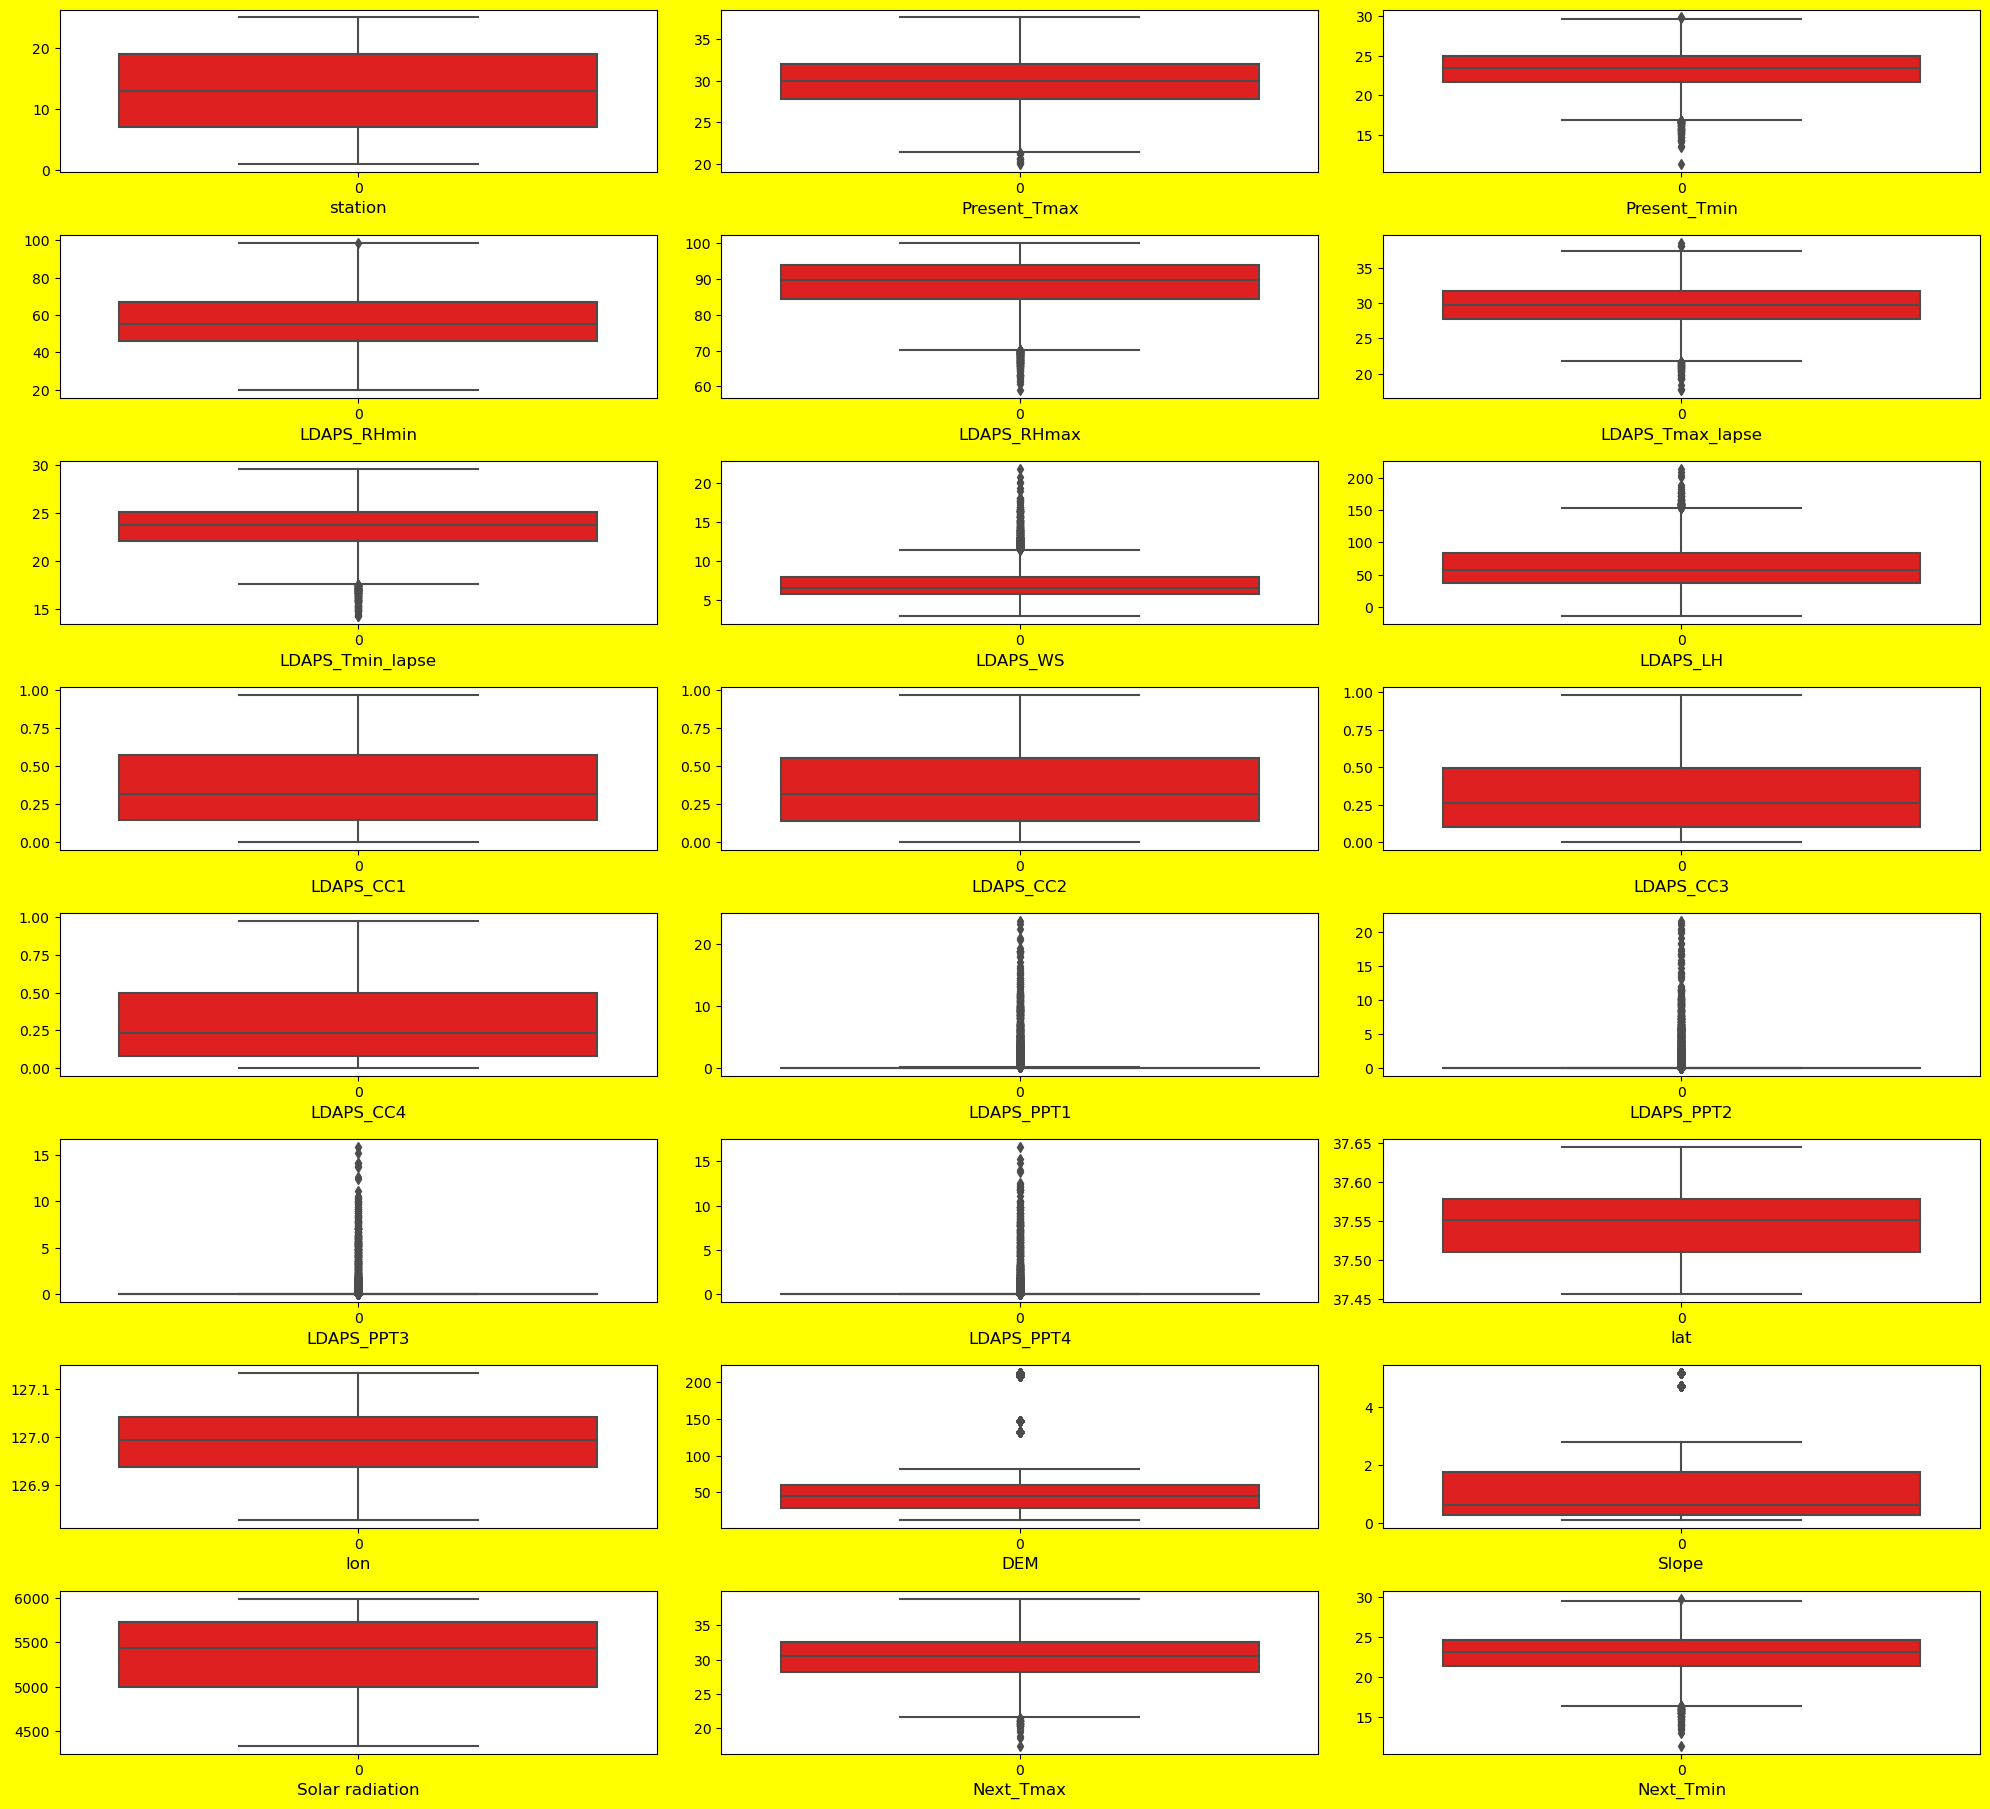

In [21]:
plt.figure(figsize=(20,20),facecolor="yellow")
plotnumber = 1
for column in df:
    if plotnumber <= 27:
        ax = plt.subplot(9,3,plotnumber)
        sns.boxplot(df[column],color = 'r')
        plt.xlabel(column, fontsize = 12)
    plotnumber+=1
plt.tight_layout() 

We can observe the features of Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse have outliers on the lower side of the data
the features of LDAPS_Tmax_lapse, LDAPS_WS, LDAPS_LH, DEM, slope all have outliers in the upper part of the data.
there are outliers in the label as well and we might drop when we use the z-score to drop outliers.

In [22]:
from scipy.stats import zscore
out_features = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]
z = np.abs(zscore(out_features))
z

Present_Tmax  Present_Tmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.361913      0.760330     0.383605          0.526903   
1         0.720643      0.677021     0.312101          0.079953   
2         0.619154      0.031110     0.614626          0.162140   
3         0.754473      0.072765     1.133710          0.030062   
4         0.551494      0.552057     0.249269          0.171711   
...            ...           ...          ...               ...   
7745      2.256387      2.259902     1.412928          0.616195   
7746      2.459367      2.426521     0.654255          0.994601   
7747      2.188728      2.551485     1.327892          1.115121   
7748      2.188728      2.301557     1.547988          0.890319   
7749      2.222558      2.426521     1.555147          0.572876   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
0             0.216792  0.127716  0.208712    0.306895    0.277418   
1             0.224302  0.648283  0.314053    0.306895    0.277418   
2             0.451966  0.442119  1.250210    0.306895    0.277418   
3             0.079822  0.667609  0.097539    0.306895    0.277418   
4             0.011044  0.628368  1.358261    0.306895    0.277418   
...                ...       ...       ...         ...         ...   
7745          2.235007  0.227319  1.577311    0.306895    0.277418   
7746          2.444802  0.613089  0.587626    0.306895    0.277418   
7747          2.032211  0.437179  0.286510    0.306895    0.277418   
7748          2.050299  0.255234  0.454217    0.306895    0.277418   
7749          2.140637  0.089554  1.592952    0.306895    0.277418   

      LDAPS_PPT3  LDAPS_PPT4  
0       0.241608    0.225523  
1       0.241608    0.225523  
2       0.241608    0.225523  
3       0.241608    0.225523  
4       0.241608    0.225523  
...          ...         ...  
7745    0.241608    0.225523  
7746    0.241608    0.225523  
7747    0.241608    0.225523  
7748    0.241608    0.225523  
7749    0.241608    0.225523  

[7723 rows x 11 columns]

In [23]:
df = df[(z<3).all(axis=1)]
df.shape
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233947   
1            29.850689         24.035009  5.691890   51.937448   0.225508   
2            30.091292         24.565633  6.138224   20.573050   0.209344   
3            29.704629         23.326177  5.650050   65.727144   0.216372   
4            29.113934         23.486480  5.735004  107.965535   0.151407   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.052902   
7746         26.704905         17.814038  5.768083   82.146707   0.066461   
7747         26.352081         18.775678  6.148918   72.058294   0.030034   
7748         27.010193         18.733519  6.542819   47.241457   0.035874   
7749         27.939516         18.522965  7.289264    9.090034   0.048954   

      LDAPS_CC2     LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.203896  1.616969e-01   0.130928         0.0         0.0         0.0   
1      0.251771  1.594441e-01   0.127727         0.0         0.0         0.0   
2      0.257469  2.040915e-01   0.142125         0.0         0.0         0.0   
3      0.226002  1.611574e-01   0.134249         0.0         0.0         0.0   
4      0.249995  1.788925e-01   0.170021         0.0         0.0         0.0   
...         ...           ...        ...         ...         ...         ...   
7745   0.030169  0.000000e+00   0.004380         0.0         0.0         0.0   
7746   0.024518  5.850000e-07   0.017678         0.0         0.0         0.0   
7747   0.081035  0.000000e+00   0.000000         0.0         0.0         0.0   
7748   0.074962  0.000000e+00   0.000000         0.0         0.0         0.0   
7749   0.059869  0.000000e+00   0.000796         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.6046  126.991  212.3350  2.7850      5992.895996   
1            0.0  37.6046  127.032   44.7624  0.5141      5869.312500   
2            0.0  37.5776  127.058   33.3068  0.2661      5863.555664   
3            0.0  37.6450  127.022   45.7160  2.5348      5856.964844   
4            0.0  37.5507  127.135   35.0380  0.5055      5859.552246   
...          ...      ...      ...       ...     ...              ...   
7745         0.0  37.5507  127.040   26.2980  0.5721      4456.024414   
7746         0.0  37.5102  127.086   21.9668  0.1332      4441.803711   
7747         0.0  37.5372  126.891   15.5876  0.1554      4443.313965   
7748         0.0  37.5237  126.909   17.2956  0.2223      4438.373535   
7749         0.0  37.5237  126.970   19.5844  0.2713      4451.345215   

      Next_Tmax  Next_Tmin  
0          29.1       21.2  
1          30.5       22.5  
2          31.1       23.9  
3          31.7       24.3  
4          31.2       22.5  
...         ...        ...  
7745       27.6       17.7  
7746       28.0       17.1  
7747       28.3       18.1  
7748       28.6       18.8  
7749       27.8       17.4  

[6875 rows x 24 columns]

Here we have dropped all outliers as well

In [25]:
df.skew()

station            -0.001689
Present_Tmax       -0.276636
Present_Tmin       -0.231360
LDAPS_RHmin         0.307849
LDAPS_RHmax        -0.683988
LDAPS_Tmax_lapse   -0.106654
LDAPS_Tmin_lapse   -0.394394
LDAPS_WS            1.087354
LDAPS_LH            0.564819
LDAPS_CC1           0.597055
LDAPS_CC2           0.505145
LDAPS_CC3           0.703555
LDAPS_CC4           0.711926
LDAPS_PPT1          3.728708
LDAPS_PPT2          4.862809
LDAPS_PPT3          5.512410
LDAPS_PPT4          5.919849
lat                 0.104960
lon                -0.277149
DEM                 1.759335
Slope               1.590726
Solar radiation    -0.505979
Next_Tmax          -0.269357
Next_Tmin          -0.294408
dtype: float64

We can see the data has skewness in WS, PPT1,2,3 and 4 and DEM and slope. we will reduce the skewness by using cuberoot.

In [26]:
skew_col = ['LDAPS_WS','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
for i in skew_col:
    df[i]= np.cbrt(df[i])

In [27]:
df.skew()

station            -0.001689
Present_Tmax       -0.276636
Present_Tmin       -0.231360
LDAPS_RHmin         0.307849
LDAPS_RHmax        -0.683988
LDAPS_Tmax_lapse   -0.106654
LDAPS_Tmin_lapse   -0.394394
LDAPS_WS            0.615965
LDAPS_LH            0.564819
LDAPS_CC1           0.597055
LDAPS_CC2           0.505145
LDAPS_CC3           0.703555
LDAPS_CC4           0.711926
LDAPS_PPT1          1.861135
LDAPS_PPT2          2.250924
LDAPS_PPT3          2.396362
LDAPS_PPT4          2.714562
lat                 0.104960
lon                -0.277149
DEM                 0.933233
Slope               0.621103
Solar radiation    -0.505979
Next_Tmax          -0.269357
Next_Tmin          -0.294408
dtype: float64

the data has less skewness now and we can now check correlation

In [28]:
corr = df.corr()
corr

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110562      0.133293    -0.068015   
Present_Tmax      0.110562      1.000000      0.614567    -0.149192   
Present_Tmin      0.133293      0.614567      1.000000     0.152756   
LDAPS_RHmin      -0.068015     -0.149192      0.152756     1.000000   
LDAPS_RHmax      -0.171912     -0.291122     -0.034905     0.553488   
LDAPS_Tmax_lapse  0.066322      0.535958      0.436765    -0.552032   
LDAPS_Tmin_lapse  0.103681      0.611660      0.755268     0.134889   
LDAPS_WS          0.023674     -0.092193      0.025126     0.213827   
LDAPS_LH         -0.134194      0.127395     -0.007497    -0.038545   
LDAPS_CC1         0.008961     -0.284081      0.092326     0.575476   
LDAPS_CC2         0.006426     -0.152281      0.120516     0.714372   
LDAPS_CC3         0.007741     -0.057685      0.043689     0.655470   
LDAPS_CC4         0.011175     -0.047677     -0.004529     0.457906   
LDAPS_PPT1       -0.001694     -0.169556      0.099080     0.403578   
LDAPS_PPT2       -0.014521     -0.066066      0.126331     0.510449   
LDAPS_PPT3       -0.006054     -0.015448      0.059677     0.399479   
LDAPS_PPT4        0.005094     -0.020854     -0.040485     0.249789   
lat              -0.240252     -0.051841     -0.072766     0.088984   
lon              -0.122059      0.010714     -0.044728    -0.095571   
DEM              -0.293297     -0.154299     -0.247542     0.080628   
Slope            -0.132042     -0.095251     -0.157577     0.093722   
Solar radiation  -0.029844     -0.061378      0.015199     0.251771   
Next_Tmax         0.107297      0.587400      0.449434    -0.425850   
Next_Tmin         0.129108      0.616514      0.786753     0.140024   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.171912          0.066322          0.103681  0.023674   
Present_Tmax        -0.291122          0.535958          0.611660 -0.092193   
Present_Tmin        -0.034905          0.436765          0.755268  0.025126   
LDAPS_RHmin          0.553488         -0.552032          0.134889  0.213827   
LDAPS_RHmax          1.000000         -0.383849         -0.135091  0.075914   
LDAPS_Tmax_lapse    -0.383849          1.000000          0.621085 -0.202615   
LDAPS_Tmin_lapse    -0.135091          0.621085          1.000000 -0.037471   
LDAPS_WS             0.075914         -0.202615         -0.037471  1.000000   
LDAPS_LH             0.270165          0.034467         -0.139240 -0.051330   
LDAPS_CC1            0.411808         -0.414094          0.041092  0.239445   
LDAPS_CC2            0.363463         -0.490302          0.105917  0.196833   
LDAPS_CC3            0.170984         -0.500006          0.023596  0.149802   
LDAPS_CC4            0.053470         -0.385998         -0.029153  0.150608   
LDAPS_PPT1           0.394098         -0.281474         -0.021656  0.232105   
LDAPS_PPT2           0.339287         -0.335447          0.035276  0.177072   
LDAPS_PPT3           0.207049         -0.268061         -0.009788  0.140854   
LDAPS_PPT4           0.121490         -0.217072         -0.096957  0.210279   
lat                  0.199143         -0.039075         -0.091102 -0.017612   
lon                  0.016998          0.103750         -0.029308 -0.077237   
DEM                  0.173086         -0.145223         -0.182009  0.138355   
Slope                0.198959         -0.121081         -0.166443  0.107569   
Solar radiation      0.155500          0.015446          0.111473  0.138971   
Next_Tmax           -0.297726          0.807668          0.541079 -0.248147   
Next_Tmin           -0.089056          0.547948          0.870140  0.000751   

                  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  \
station          -0.134194   0.008961   0.006426   0.007741   0.011175   
Present_Tmax      0.127395  -0.284081  -0.152281  -0.057685  -0.047677   
Present_Tmin     -0.007497   0.092326   0.120

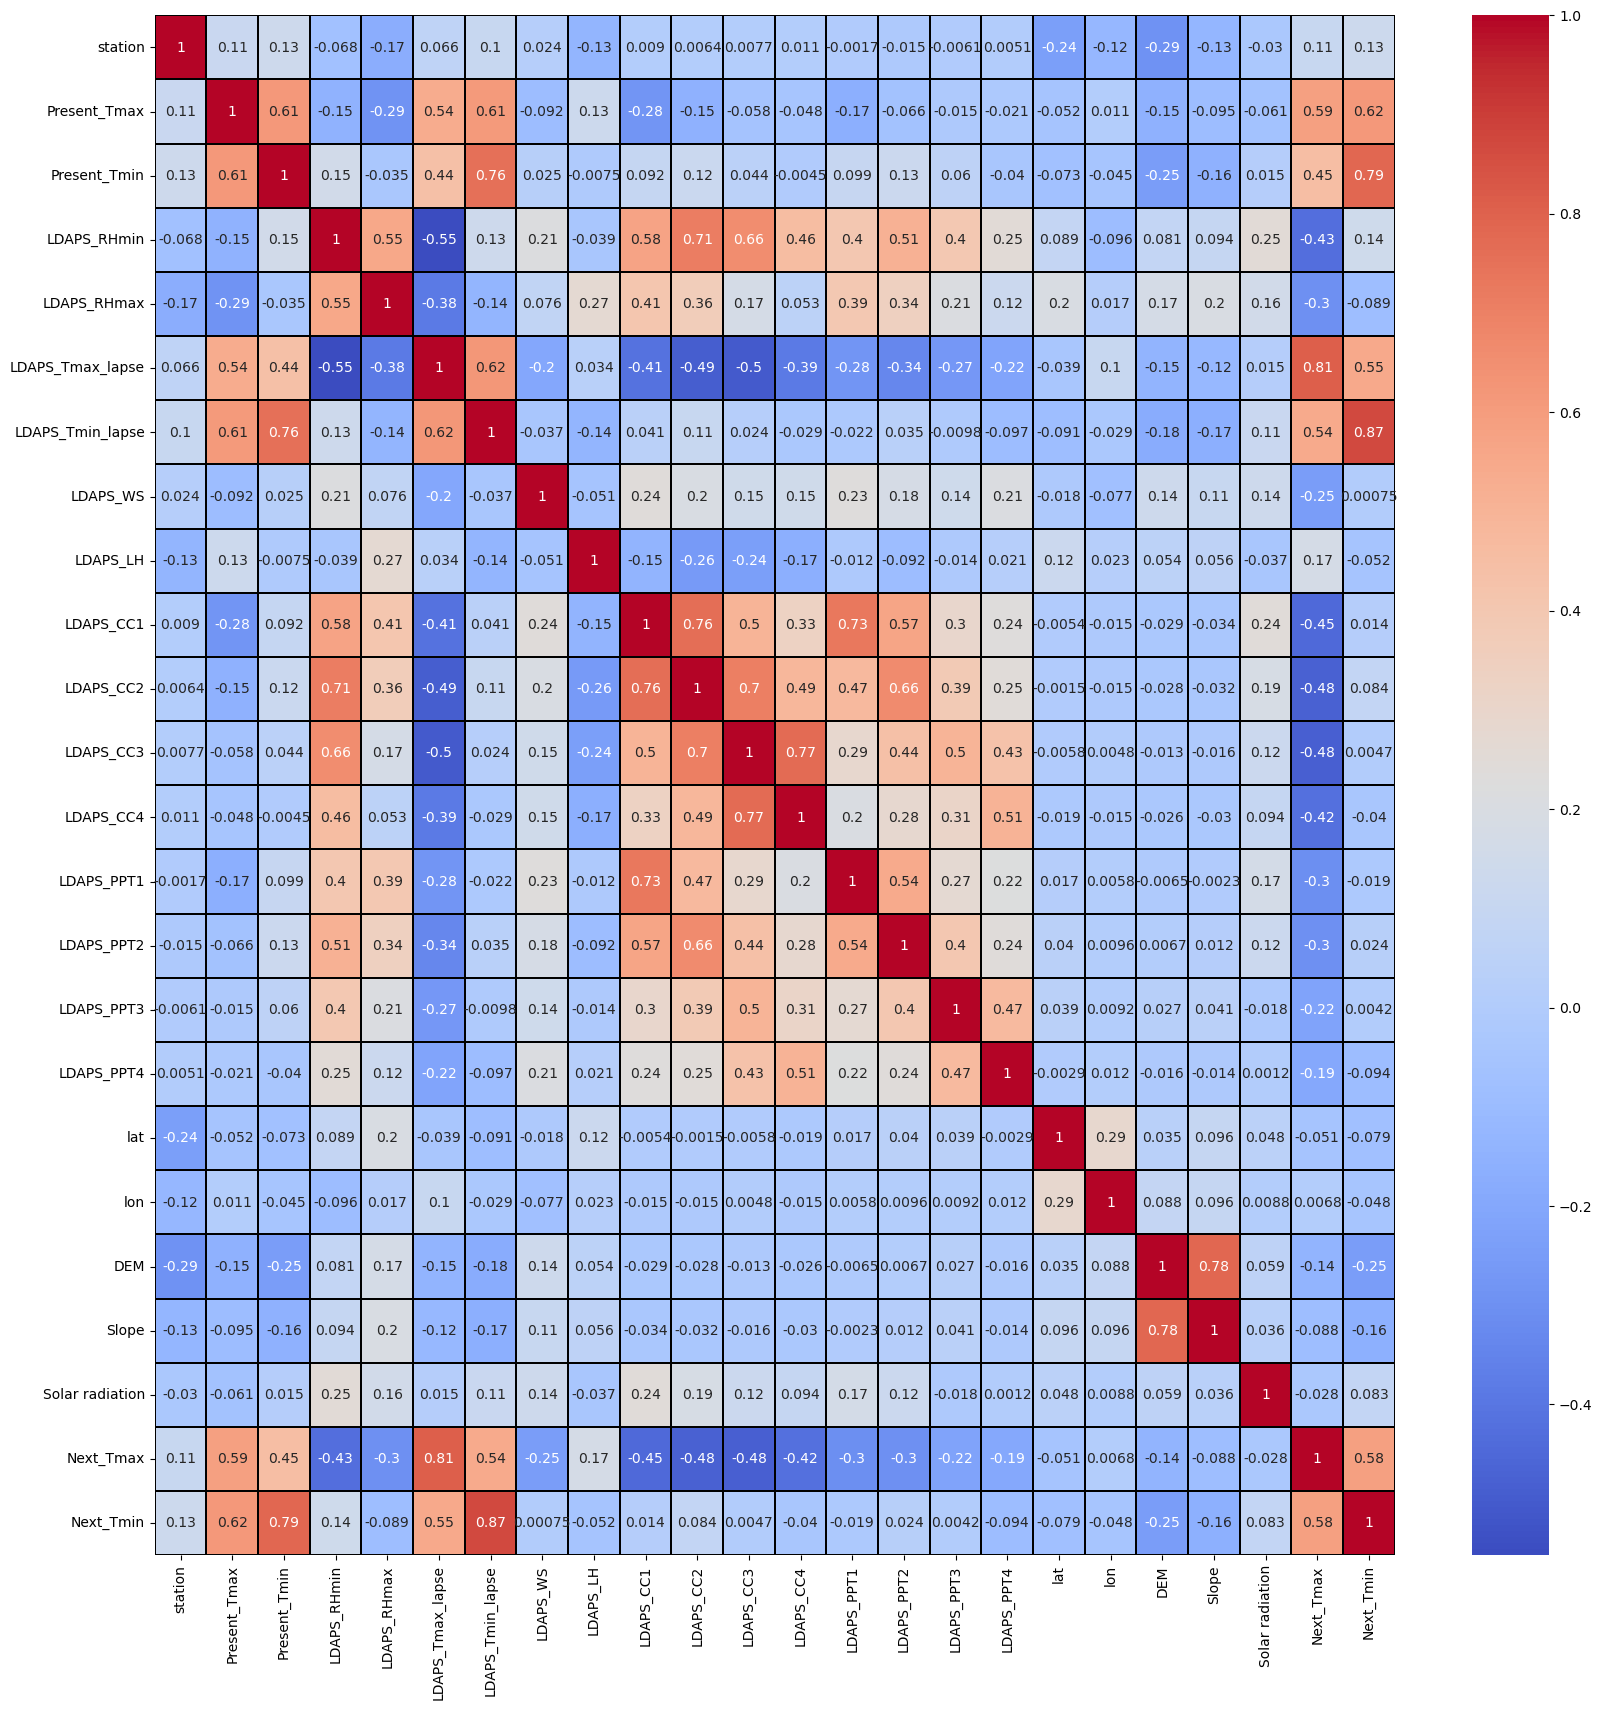

In [29]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),linewidth = 0.1,fmt = ".2g",annot = True,cmap = "coolwarm",linecolor = 'black')
plt.yticks(rotation = 0)
plt.show()

from the heat map we can observe there are features like Present_Tmin, LDAPS_Tmin_lapse, LDAPS_Tmax_lapse and DEM showing correlation. We will drop suitable features using vif

In [30]:
x1 = df.drop(['Next_Tmax'], axis = 1)
y = df['Next_Tmax']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)
x1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672895     -0.431179     -0.820358     0.196425     0.439267   
1    -1.534023      0.687342     -0.734055    -0.237796     0.365333   
2    -1.395150      0.582481     -0.000480    -0.496702    -0.592891   
3    -1.256277      0.722296      0.042671     0.195273     1.214866   
4    -1.117405      0.512573     -0.604601     0.045586     0.300365   
...        ...           ...           ...          ...          ...   
6870  1.104558     -2.388589     -2.373810    -2.235929    -1.418325   
6871  1.243430     -2.598312     -2.546416    -1.844202    -0.633867   
6872  1.382303     -2.318682     -2.675870    -2.087211    -1.330398   
6873  1.521176     -2.318682     -2.416961    -2.282911    -1.557975   
6874  1.660048     -2.353636     -2.546416    -2.363173    -1.565378   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.662002         -0.284107  0.060679  0.224764  -0.441955   
1            -0.012234          0.177389 -0.626921 -0.302208  -0.475679   
2             0.075764          0.415583 -0.344609 -1.245900  -0.540274   
3            -0.065654         -0.140801 -0.654132  0.112697  -0.512188   
4            -0.281694         -0.068842 -0.599020  1.383566  -0.771794   
...                ...               ...       ...       ...        ...   
6870         -0.757608         -2.395667 -0.064675 -1.575633  -1.165428   
6871         -1.162772         -2.615165 -0.577709  0.606729  -1.111245   
6872         -1.291813         -2.183491 -0.338016  0.303188  -1.256810   
6873         -1.051115         -2.202416 -0.100296 -0.443501  -1.233475   
6874         -0.711226         -2.296932  0.325226 -1.591401  -1.181207   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0     -0.529567  -0.573268  -0.619161    -0.55125   -0.497953   -0.478616   
1     -0.329517  -0.583082  -0.632818    -0.55125   -0.497953   -0.478616   
2     -0.305707  -0.388588  -0.571387    -0.55125   -0.497953   -0.478616   
3     -0.437193  -0.575618  -0.604994    -0.55125   -0.497953   -0.478616   
4     -0.336938  -0.498360  -0.452367    -0.55125   -0.497953   -0.478616   
...         ...        ...        ...         ...         ...         ...   
6870  -1.255491  -1.277654  -1.159095    -0.55125   -0.497953   -0.478616   
6871  -1.279101  -1.277652  -1.102358    -0.55125   -0.497953   -0.478616   
6872  -1.042945  -1.277654  -1.177783    -0.55125   -0.497953   -0.478616   
6873  -1.068320  -1.277654  -1.177783    -0.55125   -0.497953   -0.478616   
6874  -1.131390  -1.277654  -1.174386    -0.55125   -0.497953   -0.478616   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.421854  1.211762  0.002029  2.360798  1.291698         1.549553   
1      -0.421854  1.211762  0.517277 -0.138252 -0.416470         1.256001   
2      -0.421854  0.671902  0.844020 -0.482990 -0.861634         1.242327   
3      -0.421854  2.019553  0.391607 -0.112346  1.169161         1.226672   
4      -0.421854  0.134041  1.811682 -0.426283 -0.429135         1.232818   
...          ...       ...       ...       ...       ...              ...   
6870   -0.421854  0.134041  0.617814 -0.735117 -0.334538        -2.101025   
6871   -0.421854 -0.675749  1.195897 -0.914267 -1.235216        -2.134804   
6872   -0.421854 -0.135889 -1.254674 -1.227392 -1.159295        -2.131217   
6873   -0.421854 -0.405819 -1.028468 -1.136240 -0.967155        -2.142952   
6874   -0.421854 -0.405819 -0.261879 -1.023060 -0.849897        -2.112140   

      Next_Tmin  
0     -0.784400  
1     -0.239034  
2      0.348284  
3      0.516089  
4     -0.239034  
...         ...  
6870  -2.252695  
6871  -2.504402  
6872  -2.084890  
6873  -1.791231  
6874  -2.378549  

[6875 rows x 23 columns]

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["features"] = x1.columns
vif

VIF values          features
0     1.245143           station
1     2.771287      Present_Tmax
2     3.326427      Present_Tmin
3     5.937207       LDAPS_RHmin
4     2.236252       LDAPS_RHmax
5     6.859384  LDAPS_Tmax_lapse
6     8.474766  LDAPS_Tmin_lapse
7     1.210456          LDAPS_WS
8     1.529548          LDAPS_LH
9     4.809094         LDAPS_CC1
10    5.388670         LDAPS_CC2
11    5.121204         LDAPS_CC3
12    3.003483         LDAPS_CC4
13    2.674298        LDAPS_PPT1
14    2.213760        LDAPS_PPT2
15    1.732817        LDAPS_PPT3
16    1.745989        LDAPS_PPT4
17    1.244318               lat
18    1.180559               lon
19    3.256933               DEM
20    2.913577             Slope
21    1.250726   Solar radiation
22    5.435154         Next_Tmin

In [33]:
x = x1.drop('LDAPS_Tmin_lapse',axis = 1)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672895     -0.431179     -0.820358     0.196425     0.439267   
1    -1.534023      0.687342     -0.734055    -0.237796     0.365333   
2    -1.395150      0.582481     -0.000480    -0.496702    -0.592891   
3    -1.256277      0.722296      0.042671     0.195273     1.214866   
4    -1.117405      0.512573     -0.604601     0.045586     0.300365   
...        ...           ...           ...          ...          ...   
6870  1.104558     -2.388589     -2.373810    -2.235929    -1.418325   
6871  1.243430     -2.598312     -2.546416    -1.844202    -0.633867   
6872  1.382303     -2.318682     -2.675870    -2.087211    -1.330398   
6873  1.521176     -2.318682     -2.416961    -2.282911    -1.557975   
6874  1.660048     -2.353636     -2.546416    -2.363173    -1.565378   

      LDAPS_Tmax_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.662002  0.060679  0.224764  -0.441955  -0.529567  -0.573268   
1            -0.012234 -0.626921 -0.302208  -0.475679  -0.329517  -0.583082   
2             0.075764 -0.344609 -1.245900  -0.540274  -0.305707  -0.388588   
3            -0.065654 -0.654132  0.112697  -0.512188  -0.437193  -0.575618   
4            -0.281694 -0.599020  1.383566  -0.771794  -0.336938  -0.498360   
...                ...       ...       ...        ...        ...        ...   
6870         -0.757608 -0.064675 -1.575633  -1.165428  -1.255491  -1.277654   
6871         -1.162772 -0.577709  0.606729  -1.111245  -1.279101  -1.277652   
6872         -1.291813 -0.338016  0.303188  -1.256810  -1.042945  -1.277654   
6873         -1.051115 -0.100296 -0.443501  -1.233475  -1.068320  -1.277654   
6874         -0.711226  0.325226 -1.591401  -1.181207  -1.131390  -1.277654   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
0     -0.619161    -0.55125   -0.497953   -0.478616   -0.421854  1.211762   
1     -0.632818    -0.55125   -0.497953   -0.478616   -0.421854  1.211762   
2     -0.571387    -0.55125   -0.497953   -0.478616   -0.421854  0.671902   
3     -0.604994    -0.55125   -0.497953   -0.478616   -0.421854  2.019553   
4     -0.452367    -0.55125   -0.497953   -0.478616   -0.421854  0.134041   
...         ...         ...         ...         ...         ...       ...   
6870  -1.159095    -0.55125   -0.497953   -0.478616   -0.421854  0.134041   
6871  -1.102358    -0.55125   -0.497953   -0.478616   -0.421854 -0.675749   
6872  -1.177783    -0.55125   -0.497953   -0.478616   -0.421854 -0.135889   
6873  -1.177783    -0.55125   -0.497953   -0.478616   -0.421854 -0.405819   
6874  -1.174386    -0.55125   -0.497953   -0.478616   -0.421854 -0.405819   

           lon       DEM     Slope  Solar radiation  Next_Tmin  
0     0.002029  2.360798  1.291698         1.549553  -0.784400  
1     0.517277 -0.138252 -0.416470         1.256001  -0.239034  
2     0.844020 -0.482990 -0.861634         1.242327   0.348284  
3     0.391607 -0.112346  1.169161         1.226672   0.516089  
4     1.811682 -0.426283 -0.429135         1.232818  -0.239034  
...        ...       ...       ...              ...        ...  
6870  0.617814 -0.735117 -0.334538        -2.101025  -2.252695  
6871  1.195897 -0.914267 -1.235216        -2.134804  -2.504402  
6872 -1.254674 -1.227392 -1.159295        -2.131217  -2.084890  
6873 -1.028468 -1.136240 -0.967155        -2.142952  -1.791231  
6874 -0.261879 -1.023060 -0.849897        -2.112140  -2.378549  

[6875 rows x 22 columns]

We observed the LDAPS_Tmin_lapse having a higher inflation factor and hence dropped it. Let us check VIF once again.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"] = x.columns
vif

VIF values          features
0     1.244710           station
1     2.642296      Present_Tmax
2     3.233490      Present_Tmin
3     4.756928       LDAPS_RHmin
4     2.215835       LDAPS_RHmax
5     4.298519  LDAPS_Tmax_lapse
6     1.209554          LDAPS_WS
7     1.452147          LDAPS_LH
8     4.683094         LDAPS_CC1
9     5.359923         LDAPS_CC2
10    5.121201         LDAPS_CC3
11    3.003387         LDAPS_CC4
12    2.641346        LDAPS_PPT1
13    2.208097        LDAPS_PPT2
14    1.729235        LDAPS_PPT3
15    1.736884        LDAPS_PPT4
16    1.240371               lat
17    1.178343               lon
18    3.150703               DEM
19    2.810313             Slope
20    1.239366   Solar radiation
21    4.406384         Next_Tmin

the inflation factors are now low and in an acceptable range

Let us now start model building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [36]:
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ",maxAccu , " at random state ", maxRs )

Best accuracy is  0.7977949202626778  at random state  61


We will split the data into train and test using this random state.

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = maxRs)

In [38]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [39]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
rfr = RandomForestRegressor()
etr = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
knn = KNN()
svr = SVR()

In [40]:
models = {'Linear Regression':lr,'Lasso':lasso,'Ridge':ridge,'Random Forest Regressor':rfr,'Extra tree regressor':etr,'Decision tree regressor':dtr,'KNN':knn,'SVR':svr}
for name, model in models.items():
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred_train = model.predict(x_train)
    print("following is the score of ",name)
    print("R2 score : ",r2_score(y_test,pred)*100)
    #print("R2 score on training data : ",r2_score(y_test,pred_train)*100)
    print("Mean absolute error : ",mean_absolute_error(y_test,pred))
    print("Mean squared error  : ",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    score = cross_val_score(model,x,y,)
    print(score)
    print(score.mean())
    #sc_mean = score.mean()
    print("difference between r2 score and cross val score : ", r2_score(y_test,pred)-score.mean())
    print("\n\n")

following is the score of  Linear Regression
R2 score :  79.77949202626779
Mean absolute error :  1.0534712285084924
Mean squared error  :  1.895046201750618
Root mean squared error : 1.3766067709228436
[0.74003984 0.67484379 0.68060889 0.73768055 0.6871691 ]
0.7040684353200175
difference between r2 score and cross val score :  0.09372648494266034



following is the score of  Lasso
R2 score :  52.987549617664854
Mean absolute error :  1.6649260082505848
Mean squared error  :  4.405960802160284
Root mean squared error : 2.099038065915024
[0.46777744 0.46753672 0.56355272 0.36997978 0.52404673]
0.4785786756126124
difference between r2 score and cross val score :  0.051296820564036116



following is the score of  Ridge
R2 score :  79.77914927367462
Mean absolute error :  1.0534729064706754
Mean squared error  :  1.8950783241879312
Root mean squared error : 1.376618438125805
[0.74009537 0.67484742 0.68062176 0.73772407 0.68718798]
0.7040953210257537
difference between r2 score and cross 

The extra tree regressor has given the best accuracy of 91% and has a good cross val score. We will select it for parameter tuning.

In [41]:
from sklearn.model_selection import GridSearchCV
params1 = {
    'criterion':["squared_error", "poisson"],
    'max_depth':range(4,9),
    'min_samples_split':range(3,9),
    'max_features':['sqrt','log2'],
}

In [42]:
ET_cv = GridSearchCV(estimator = ExtraTreesRegressor(),param_grid = params1,n_jobs = -1)
ET_cv.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': range(4, 9),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': range(3, 9)})

In [43]:
best_param = ET_cv.best_params_
print(best_param)

{'criterion': 'poisson', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 4}


The best parameters are for critetion 'poisson', at max depth 8 , max features 'sqrt' and min samples split 4. However we will tune the parameters for more accuracy.

In [44]:
model1 = ExtraTreesRegressor(criterion = 'poisson',max_depth = 8,max_features = 'sqrt',min_samples_split=4)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

75.92355659389783


In [45]:
model2 = ExtraTreesRegressor(criterion = 'poisson',max_depth = 25,max_features = 'sqrt',min_samples_split=3)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

90.43479727436065


In [46]:
model2 = ExtraTreesRegressor(criterion = 'squared_error',max_depth = 15,max_features = 'sqrt',min_samples_split=4)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

87.90891069227835


In [47]:
model3 = ExtraTreesRegressor(criterion = 'squared_error',max_depth = 20,max_features = 'sqrt',min_samples_split=4)
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

89.76738797602606


In [48]:
final_model = ExtraTreesRegressor(criterion = 'squared_error',max_depth = 30,max_features = 'sqrt',min_samples_split=3)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

90.4826879167649


In [53]:
import pickle
pickle.dump(final_model,open('ETR_Tmax_forecast_eval_model','wb'))

Here we can see the model with criterion squared error at max depth 30 and max features sqrt and min samples split 3 gives the best accuracy and hence we will select it for final model building and save the model.

We will now work for model predicting Tmin.

In [54]:
x2 = df.drop(['Next_Tmin'], axis = 1)
y = df['Next_Tmin']

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x2 = pd.DataFrame(scaler.fit_transform(x2), columns = x2.columns)
x2

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672895     -0.431179     -0.820358     0.196425     0.439267   
1    -1.534023      0.687342     -0.734055    -0.237796     0.365333   
2    -1.395150      0.582481     -0.000480    -0.496702    -0.592891   
3    -1.256277      0.722296      0.042671     0.195273     1.214866   
4    -1.117405      0.512573     -0.604601     0.045586     0.300365   
...        ...           ...           ...          ...          ...   
6870  1.104558     -2.388589     -2.373810    -2.235929    -1.418325   
6871  1.243430     -2.598312     -2.546416    -1.844202    -0.633867   
6872  1.382303     -2.318682     -2.675870    -2.087211    -1.330398   
6873  1.521176     -2.318682     -2.416961    -2.282911    -1.557975   
6874  1.660048     -2.353636     -2.546416    -2.363173    -1.565378   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.662002         -0.284107  0.060679  0.224764  -0.441955   
1            -0.012234          0.177389 -0.626921 -0.302208  -0.475679   
2             0.075764          0.415583 -0.344609 -1.245900  -0.540274   
3            -0.065654         -0.140801 -0.654132  0.112697  -0.512188   
4            -0.281694         -0.068842 -0.599020  1.383566  -0.771794   
...                ...               ...       ...       ...        ...   
6870         -0.757608         -2.395667 -0.064675 -1.575633  -1.165428   
6871         -1.162772         -2.615165 -0.577709  0.606729  -1.111245   
6872         -1.291813         -2.183491 -0.338016  0.303188  -1.256810   
6873         -1.051115         -2.202416 -0.100296 -0.443501  -1.233475   
6874         -0.711226         -2.296932  0.325226 -1.591401  -1.181207   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0     -0.529567  -0.573268  -0.619161    -0.55125   -0.497953   -0.478616   
1     -0.329517  -0.583082  -0.632818    -0.55125   -0.497953   -0.478616   
2     -0.305707  -0.388588  -0.571387    -0.55125   -0.497953   -0.478616   
3     -0.437193  -0.575618  -0.604994    -0.55125   -0.497953   -0.478616   
4     -0.336938  -0.498360  -0.452367    -0.55125   -0.497953   -0.478616   
...         ...        ...        ...         ...         ...         ...   
6870  -1.255491  -1.277654  -1.159095    -0.55125   -0.497953   -0.478616   
6871  -1.279101  -1.277652  -1.102358    -0.55125   -0.497953   -0.478616   
6872  -1.042945  -1.277654  -1.177783    -0.55125   -0.497953   -0.478616   
6873  -1.068320  -1.277654  -1.177783    -0.55125   -0.497953   -0.478616   
6874  -1.131390  -1.277654  -1.174386    -0.55125   -0.497953   -0.478616   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.421854  1.211762  0.002029  2.360798  1.291698         1.549553   
1      -0.421854  1.211762  0.517277 -0.138252 -0.416470         1.256001   
2      -0.421854  0.671902  0.844020 -0.482990 -0.861634         1.242327   
3      -0.421854  2.019553  0.391607 -0.112346  1.169161         1.226672   
4      -0.421854  0.134041  1.811682 -0.426283 -0.429135         1.232818   
...          ...       ...       ...       ...       ...              ...   
6870   -0.421854  0.134041  0.617814 -0.735117 -0.334538        -2.101025   
6871   -0.421854 -0.675749  1.195897 -0.914267 -1.235216        -2.134804   
6872   -0.421854 -0.135889 -1.254674 -1.227392 -1.159295        -2.131217   
6873   -0.421854 -0.405819 -1.028468 -1.136240 -0.967155        -2.142952   
6874   -0.421854 -0.405819 -0.261879 -1.023060 -0.849897        -2.112140   

      Next_Tmax  
0     -0.497277  
1     -0.020778  
2      0.183436  
3      0.387650  
4      0.217472  
...         ...  
6870  -1.007813  
6871  -0.871670  
6872  -0.769563  
6873  -0.667456  
6874  -0.939741  

[6875 rows x 23 columns]

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif["features"] = x1.columns
vif

VIF values          features
0     1.245143           station
1     2.771287      Present_Tmax
2     3.326427      Present_Tmin
3     5.937207       LDAPS_RHmin
4     2.236252       LDAPS_RHmax
5     6.859384  LDAPS_Tmax_lapse
6     8.474766  LDAPS_Tmin_lapse
7     1.210456          LDAPS_WS
8     1.529548          LDAPS_LH
9     4.809094         LDAPS_CC1
10    5.388670         LDAPS_CC2
11    5.121204         LDAPS_CC3
12    3.003483         LDAPS_CC4
13    2.674298        LDAPS_PPT1
14    2.213760        LDAPS_PPT2
15    1.732817        LDAPS_PPT3
16    1.745989        LDAPS_PPT4
17    1.244318               lat
18    1.180559               lon
19    3.256933               DEM
20    2.913577             Slope
21    1.250726   Solar radiation
22    5.435154         Next_Tmin

We observed the LDAPS_Tmin_lapse has the highest vif and we will drop it and then check VIF again

In [57]:
x = x2.drop('LDAPS_Tmin_lapse',axis = 1)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672895     -0.431179     -0.820358     0.196425     0.439267   
1    -1.534023      0.687342     -0.734055    -0.237796     0.365333   
2    -1.395150      0.582481     -0.000480    -0.496702    -0.592891   
3    -1.256277      0.722296      0.042671     0.195273     1.214866   
4    -1.117405      0.512573     -0.604601     0.045586     0.300365   
...        ...           ...           ...          ...          ...   
6870  1.104558     -2.388589     -2.373810    -2.235929    -1.418325   
6871  1.243430     -2.598312     -2.546416    -1.844202    -0.633867   
6872  1.382303     -2.318682     -2.675870    -2.087211    -1.330398   
6873  1.521176     -2.318682     -2.416961    -2.282911    -1.557975   
6874  1.660048     -2.353636     -2.546416    -2.363173    -1.565378   

      LDAPS_Tmax_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0            -0.662002  0.060679  0.224764  -0.441955  -0.529567  -0.573268   
1            -0.012234 -0.626921 -0.302208  -0.475679  -0.329517  -0.583082   
2             0.075764 -0.344609 -1.245900  -0.540274  -0.305707  -0.388588   
3            -0.065654 -0.654132  0.112697  -0.512188  -0.437193  -0.575618   
4            -0.281694 -0.599020  1.383566  -0.771794  -0.336938  -0.498360   
...                ...       ...       ...        ...        ...        ...   
6870         -0.757608 -0.064675 -1.575633  -1.165428  -1.255491  -1.277654   
6871         -1.162772 -0.577709  0.606729  -1.111245  -1.279101  -1.277652   
6872         -1.291813 -0.338016  0.303188  -1.256810  -1.042945  -1.277654   
6873         -1.051115 -0.100296 -0.443501  -1.233475  -1.068320  -1.277654   
6874         -0.711226  0.325226 -1.591401  -1.181207  -1.131390  -1.277654   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
0     -0.619161    -0.55125   -0.497953   -0.478616   -0.421854  1.211762   
1     -0.632818    -0.55125   -0.497953   -0.478616   -0.421854  1.211762   
2     -0.571387    -0.55125   -0.497953   -0.478616   -0.421854  0.671902   
3     -0.604994    -0.55125   -0.497953   -0.478616   -0.421854  2.019553   
4     -0.452367    -0.55125   -0.497953   -0.478616   -0.421854  0.134041   
...         ...         ...         ...         ...         ...       ...   
6870  -1.159095    -0.55125   -0.497953   -0.478616   -0.421854  0.134041   
6871  -1.102358    -0.55125   -0.497953   -0.478616   -0.421854 -0.675749   
6872  -1.177783    -0.55125   -0.497953   -0.478616   -0.421854 -0.135889   
6873  -1.177783    -0.55125   -0.497953   -0.478616   -0.421854 -0.405819   
6874  -1.174386    -0.55125   -0.497953   -0.478616   -0.421854 -0.405819   

           lon       DEM     Slope  Solar radiation  Next_Tmax  
0     0.002029  2.360798  1.291698         1.549553  -0.497277  
1     0.517277 -0.138252 -0.416470         1.256001  -0.020778  
2     0.844020 -0.482990 -0.861634         1.242327   0.183436  
3     0.391607 -0.112346  1.169161         1.226672   0.387650  
4     1.811682 -0.426283 -0.429135         1.232818   0.217472  
...        ...       ...       ...              ...        ...  
6870  0.617814 -0.735117 -0.334538        -2.101025  -1.007813  
6871  1.195897 -0.914267 -1.235216        -2.134804  -0.871670  
6872 -1.254674 -1.227392 -1.159295        -2.131217  -0.769563  
6873 -1.028468 -1.136240 -0.967155        -2.142952  -0.667456  
6874 -0.261879 -1.023060 -0.849897        -2.112140  -0.939741  

[6875 rows x 22 columns]

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["features"] = x.columns
vif

VIF values          features
0     1.254460           station
1     2.605869      Present_Tmax
2     2.678590      Present_Tmin
3     4.080649       LDAPS_RHmin
4     2.219212       LDAPS_RHmax
5     4.516962  LDAPS_Tmax_lapse
6     1.233970          LDAPS_WS
7     1.470595          LDAPS_LH
8     4.697571         LDAPS_CC1
9     5.316136         LDAPS_CC2
10    5.135501         LDAPS_CC3
11    3.083443         LDAPS_CC4
12    2.628101        LDAPS_PPT1
13    2.180185        LDAPS_PPT2
14    1.729195        LDAPS_PPT3
15    1.739222        LDAPS_PPT4
16    1.234124               lat
17    1.184541               lon
18    3.094784               DEM
19    2.806730             Slope
20    1.238216   Solar radiation
21    3.987359         Next_Tmax

Now the VIF is in acceptable range

In [59]:
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ",maxAccu , " at random state ", maxRs )

Best accuracy is  0.8177942117851477  at random state  103


This is the best accuracy and we will split the data at this random state.

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = maxRs)

In [61]:
models = {'Linear Regression':lr,'Lasso':lasso,'Ridge':ridge,'Random Forest Regressor':rfr,'Extra tree regressor':etr,'Decision tree regressor':dtr,'KNN':knn,'SVR':svr}
for name, model in models.items():
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred_train = model.predict(x_train)
    print("following is the score of ",name)
    print("R2 score : ",r2_score(y_test,pred)*100)
    #print("R2 score on training data : ",r2_score(y_test,pred_train)*100)
    print("Mean absolute error : ",mean_absolute_error(y_test,pred))
    print("Mean squared error  : ",mean_squared_error(y_test,pred))
    print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred)))
    score = cross_val_score(model,x,y,)
    print(score)
    print(score.mean())
    #sc_mean = score.mean()
    print("difference between r2 score and cross val score : ", r2_score(y_test,pred)-score.mean())
    print("\n\n")

following is the score of  Linear Regression
R2 score :  81.77942117851477
Mean absolute error :  0.8239815411672872
Mean squared error  :  1.0809737313652286
Root mean squared error : 1.0396988657131585
[0.66615083 0.63145221 0.72472795 0.82976964 0.82291884]
0.7350038935029808
difference between r2 score and cross val score :  0.08279031828216687



following is the score of  Lasso
R2 score :  44.061720318659845
Mean absolute error :  1.4457548408344842
Mean squared error  :  3.3186547752252484
Root mean squared error : 1.8217175344232839
[0.30888349 0.17938942 0.39151079 0.34913803 0.45496042]
0.33677643042535266
difference between r2 score and cross val score :  0.10384077276124581



following is the score of  Ridge
R2 score :  81.77908639135143
Mean absolute error :  0.8239819066245349
Mean squared error  :  1.0809935933099395
Root mean squared error : 1.0397084174469011
[0.66610183 0.63147441 0.72475733 0.82977068 0.82296312]
0.735013475628451
difference between r2 score and cro

We are getting max accuracy of 90% and good cross val score as well for the Extra Tree Regressor and we will slect it for tuning.

In [62]:
from sklearn.model_selection import GridSearchCV
params1 = {
    'criterion':["squared_error", "poisson"],
    'max_depth':range(4,9),
    'min_samples_split':range(3,9),
    'max_features':['sqrt','log2'],
}

In [63]:
ET_Tmin_cv = GridSearchCV(estimator = ExtraTreesRegressor(),param_grid = params1,n_jobs = -1)
ET_Tmin_cv.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': range(4, 9),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': range(3, 9)})

In [64]:
best_param = ET_cv.best_params_
print(best_param)

{'criterion': 'poisson', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 4}


The best parameter is for criterion poisson at max depth 8 and max features sqrt and min samples split 4.

In [65]:
model = ExtraTreesRegressor(criterion = 'poisson',max_depth = 8,max_features = 'log2',min_samples_split=4)
model.fit(x_train,y_train)
pred = model.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

72.31241504132065


In [66]:
final_model = ExtraTreesRegressor(criterion = 'poisson',max_depth = 25,max_features = 'log2',min_samples_split=3)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = r2_score(y_test,pred)
print(acc*100)

89.2666581036609


after trial and error it was observed the model gave best accuracy for poisson at depth 25 and features log2 and split 3

In [67]:
import pickle
pickle.dump(final_model,open('ETR_Tmin_forecast_eval_model','wb'))